In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime 
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import chi2
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer, roc_auc_score


print('pandas version : ', pd.__version__)
print('numpy version : ', np.__version__)
print('matplotlib version : ', matplotlib.__version__)
print('seaborn version : ', sns.__version__)

# statistic tools
import statsmodels.api as sm
import scipy.stats as st
from scipy.stats import shapiro, mannwhitneyu, chi2_contingency

# scikit learn framework
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.naive_bayes import GaussianNB


pandas version :  2.2.2
numpy version :  1.26.4
matplotlib version :  3.9.0
seaborn version :  0.13.2


In [2]:
sns.set(rc={'figure.figsize':(20.7,8.27)})
sns.set_style("whitegrid")
sns.color_palette("dark")
plt.style.use("fivethirtyeight")
pd.set_option('display.max_columns', None)

# Load Data

In [4]:
df = pd.read_csv('dataset_hr.csv')
df.sample(10)

,Username,EnterpriseID,StatusPernikahan,JenisKelamin,StatusKepegawaian,Pekerjaan,JenjangKarir,PerformancePegawai,AsalDaerah,HiringPlatform,SkorSurveyEngagement,SkorKepuasanPegawai,JumlahKeikutsertaanProjek,JumlahKeterlambatanSebulanTerakhir,JumlahKetidakhadiran,NomorHP,Email,TingkatPendidikan,PernahBekerja,IkutProgramLOP,AlasanResign,TanggalLahir,TanggalHiring,TanggalPenilaianKaryawan,TanggalResign
67,mellowCheese1,105779,Bercerai,Pria,Outsource,Software Engineer (Back End),Mid_level,Kurang,Jakarta Barat,Employee_Referral,3,3.0,0.0,0.0,NaN,+6287742497xxx,mellowCheese1411@icloud.com,Doktor,1,NaN,masih_bekerja,1985-09-15,2015-3-30,2020-2-18,-
92,boredHyena0,101306,Menikah,Wanita,Outsource,Software Engineer (Back End),Freshgraduate_program,Biasa,Jakarta Timur,LinkedIn,4,3.0,0.0,0.0,17.0,+6285758275xxx,boredHyena0206@hotmail.com,Sarjana,1,NaN,masih_bekerja,1952-02-11,2012-5-14,2014-07-02,-
20,peacefulCoati5,100301,Menikah,Wanita,FullTime,Product Manager,Senior_level,Sangat_bagus,Jakarta Utara,LinkedIn,4,5.0,0.0,0.0,15.0,+6283355427xxx,peacefulCoati5154@yahoo.com,Sarjana,1,NaN,masih_bekerja,1977-05-22,2012-01-09,2020-01-07,-
128,brainyGranola0,111427,Belum_menikah,Pria,Outsource,Software Engineer (Android),Mid_level,Biasa,Jakarta Selatan,CareerBuilder,4,3.0,0.0,0.0,4.0,+6281268533xxx,brainyGranola0883@gmail.com,Doktor,1,NaN,masih_bekerja,1954-10-12,2014-05-12,2020-1-28,-
132,stressedBittern3,110774,Belum_menikah,Wanita,Outsource,Data Engineer,Freshgraduate_program,Sangat_bagus,Jakarta Pusat,LinkedIn,3,4.0,5.0,0.0,1.0,+6285838402xxx,stressedBittern3064@yahoo.com,Magister,1,NaN,apresiasi,1968-07-06,2010-05-01,2020-02-01,2017-4-15
227,alertSyrup3,111486,Belum_menikah,Pria,FullTime,Software Engineer (Android),Mid_level,Biasa,Jakarta Utara,Google_Search,4,5.0,0.0,0.0,4.0,+6285607737xxx,alertSyrup3002@hotmail.com,Sarjana,1,NaN,NaN,1987-03-18,2011-04-04,2019-07-02,-
153,jealousPlover2,106294,Belum_menikah,Wanita,FullTime,Software Engineer (Front End),Freshgraduate_program,Bagus,Jakarta Selatan,LinkedIn,2,5.0,0.0,0.0,4.0,+6289993369xxx,jealousPlover2299@hotmail.com,Sarjana,1,NaN,masih_bekerja,1984-07-07,2013-07-08,2020-01-02,-
229,kindEland7,105293,Belum_menikah,Wanita,FullTime,Data Analyst,Mid_level,Sangat_bagus,Jakarta Barat,Indeed,4,5.0,0.0,0.0,15.0,+6289783478xxx,kindEland7431@hotmail.com,Sarjana,1,NaN,masih_bekerja,1988-09-27,2008-01-07,2020-01-03,-
59,lazyToucan3,106660,Bercerai,Wanita,FullTime,Software Engineer (Front End),Freshgraduate_program,Kurang,Jakarta Utara,Diversity_Job_Fair,3,5.0,0.0,0.0,11.0,+6287705186xxx,lazyToucan3860@gmail.com,Magister,1,NaN,masih_bekerja,1975-04-03,2009-4-27,2013-2-15,-
84,scornfulCoati1,110699,Belum_menikah,Pria,Outsource,Software Engineer (Front End),Senior_level,Kurang,Jakarta Barat,Google_Search,4,4.0,0.0,5.0,16.0,+6285585054xxx,scornfulCoati1438@icloud.com,Magister,1,NaN,toxic_culture,1983-09-02,2012-04-02,2019-04-12,2020-9-27


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287 entries, 0 to 286
Data columns (total 25 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Username                            287 non-null    object 
 1   EnterpriseID                        287 non-null    int64  
 2   StatusPernikahan                    287 non-null    object 
 3   JenisKelamin                        287 non-null    object 
 4   StatusKepegawaian                   287 non-null    object 
 5   Pekerjaan                           287 non-null    object 
 6   JenjangKarir                        287 non-null    object 
 7   PerformancePegawai                  287 non-null    object 
 8   AsalDaerah                          287 non-null    object 
 9   HiringPlatform                      287 non-null    object 
 10  SkorSurveyEngagement                287 non-null    int64  
 11  SkorKepuasanPegawai                 282 non-n

In [6]:
df.isna().sum()

Username                                0
EnterpriseID                            0
StatusPernikahan                        0
JenisKelamin                            0
StatusKepegawaian                       0
Pekerjaan                               0
JenjangKarir                            0
PerformancePegawai                      0
AsalDaerah                              0
HiringPlatform                          0
SkorSurveyEngagement                    0
SkorKepuasanPegawai                     5
JumlahKeikutsertaanProjek               3
JumlahKeterlambatanSebulanTerakhir      1
JumlahKetidakhadiran                    6
NomorHP                                 0
Email                                   0
TingkatPendidikan                       0
PernahBekerja                           0
IkutProgramLOP                        258
AlasanResign                           66
TanggalLahir                            0
TanggalHiring                           0
TanggalPenilaianKaryawan          

In [7]:
df.nunique()

Username                              285
EnterpriseID                          287
StatusPernikahan                        5
JenisKelamin                            2
StatusKepegawaian                       3
Pekerjaan                              14
JenjangKarir                            3
PerformancePegawai                      5
AsalDaerah                              5
HiringPlatform                          9
SkorSurveyEngagement                    5
SkorKepuasanPegawai                     5
JumlahKeikutsertaanProjek               9
JumlahKeterlambatanSebulanTerakhir      7
JumlahKetidakhadiran                   22
NomorHP                               287
Email                                 287
TingkatPendidikan                       3
PernahBekerja                           2
IkutProgramLOP                          2
AlasanResign                           11
TanggalLahir                          284
TanggalHiring                          97
TanggalPenilaianKaryawan          

In [8]:
df.duplicated().sum()

0

In [9]:
num = ['JumlahKeikutsertaanProjek', 'JumlahKeterlambatanSebulanTerakhir', 'JumlahKetidakhadiran', 'SkorKepuasanPegawai', 'SkorSurveyEngagement']
cat = ['Username', 'StatusPernikahan', 'JenisKelamin', 'StatusKepegawaian', 'Pekerjaan', 'JenjangKarir', 'PerformancePegawai', 'AsalDaerah', 'HiringPlatform', 'NomorHP', 'Email', 'TingkatPendidikan', 'PernahBekerja', 'IkutProgramLOP', 'AlasanResign']
time = ['TanggalLahir',	'TanggalHiring', 'TanggalPenilaianKaryawan','TanggalResign']

In [10]:
for col in cat:
    df[col] = df[col].astype('object')

## Pendekatan Numerik

In [12]:
df.describe()

,EnterpriseID,SkorSurveyEngagement,SkorKepuasanPegawai,JumlahKeikutsertaanProjek,JumlahKeterlambatanSebulanTerakhir,JumlahKetidakhadiran
count,287.000000,287.000000,282.000000,284.000000,286.000000,281.000000
mean,105923.324042,3.101045,3.904255,1.179577,0.412587,10.448399
std,4044.977599,0.836388,0.913355,2.294441,1.275016,6.902252
min,100282.000000,1.000000,1.000000,0.000000,0.000000,1.000000
25%,101269.000000,3.000000,3.000000,0.000000,0.000000,5.000000
50%,106069.000000,3.000000,4.000000,0.000000,0.000000,10.000000
75%,110514.500000,4.000000,5.000000,0.000000,0.000000,15.000000
max,111703.000000,5.000000,5.000000,8.000000,6.000000,55.000000


In [13]:
df[cat].describe()

,Username,StatusPernikahan,JenisKelamin,StatusKepegawaian,Pekerjaan,JenjangKarir,PerformancePegawai,AsalDaerah,HiringPlatform,NomorHP,Email,TingkatPendidikan,PernahBekerja,IkutProgramLOP,AlasanResign
count,287,287,287,287,287,287,287,287,287,287,287,287,287,29.0,221
unique,285,5,2,3,14,3,5,5,9,287,287,3,2,2.0,11
top,boredEggs0,Belum_menikah,Wanita,FullTime,Software Engineer (Back End),Freshgraduate_program,Biasa,Jakarta Pusat,Indeed,+6282232522xxx,spiritedPorpoise3135@yahoo.com,Sarjana,1,1.0,masih_bekerja
freq,2,132,167,217,109,169,85,72,85,1,1,176,286,15.0,132


In [14]:
for col in cat:
    print(f'''Value count kolom {col}:''')
    print(df[col].value_counts())
    print()

Value count kolom Username:
Username
boredEggs0           2
brainyMagpie7        2
spiritedPorpoise3    1
grudgingMeerkat3     1
boastfulSyrup4       1
                    ..
lazyPorpoise0        1
brainyFish3          1
sincereSeafowl4      1
jumpyTomatoe4        1
puzzledFish5         1
Name: count, Length: 285, dtype: int64

Value count kolom StatusPernikahan:
StatusPernikahan
Belum_menikah    132
Menikah           57
Lainnya           48
Bercerai          47
-                  3
Name: count, dtype: int64

Value count kolom JenisKelamin:
JenisKelamin
Wanita    167
Pria      120
Name: count, dtype: int64

Value count kolom StatusKepegawaian:
StatusKepegawaian
FullTime      217
Outsource      66
Internship      4
Name: count, dtype: int64

Value count kolom Pekerjaan:
Pekerjaan
Software Engineer (Back End)      109
Software Engineer (Front End)      72
Software Engineer (Android)        24
Product Design (UI & UX)           24
Product Manager                    17
Data Analyst        

# Data Preprocessing

## Handling Missing Value

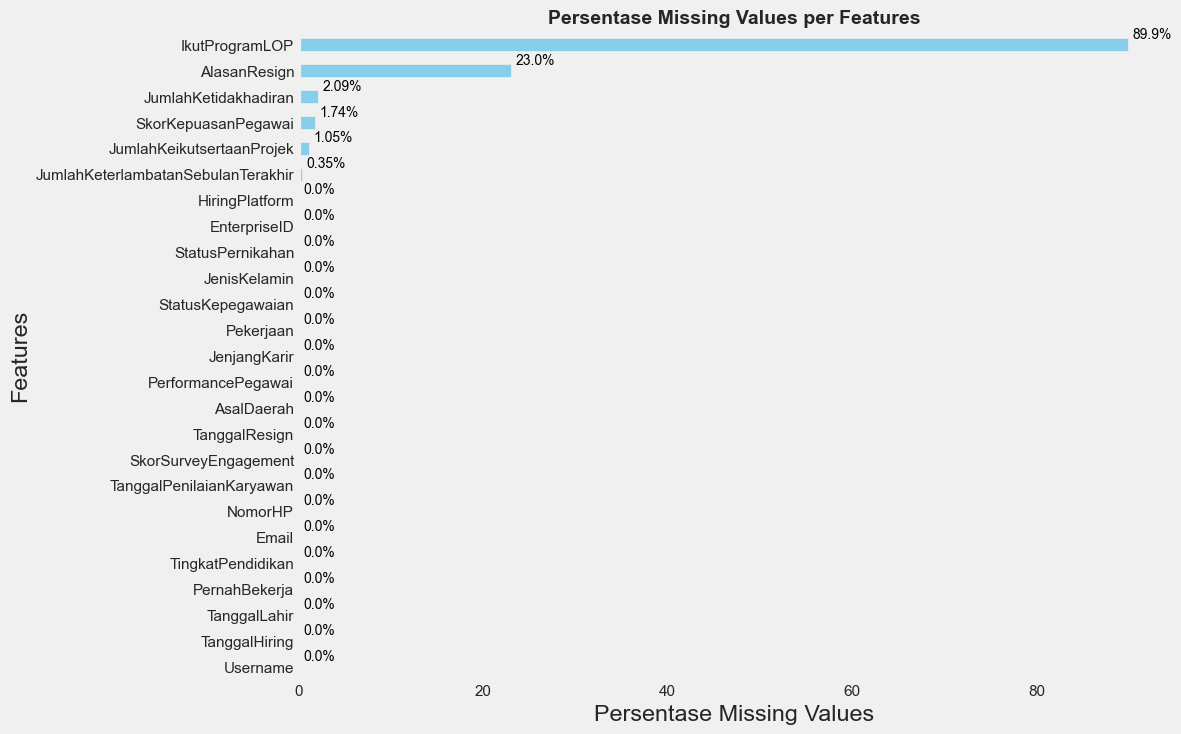

In [17]:
# 1. Handling Missing Value
missing_percentage = df.isnull().sum() * 100 / len(df)

# Mengurutkan dari yang terbesar ke terkecil
missing_percentage_sorted = missing_percentage.sort_values(ascending=True)

# Membuat bar chart horizontal
plt.figure(figsize=(10, 8))
ax = missing_percentage_sorted.plot(kind='barh', color='skyblue')

# Menghilangkan grid garis
ax.grid(False)

# Menambahkan label persentase pada setiap bar
for i in ax.patches:
    plt.text(i.get_width() + 0.5, i.get_y() + 0.5, 
             str(round(i.get_width(), 2)) + '%', 
             fontsize=10, color='black')

# Memberikan judul dan label sumbu
plt.title('Persentase Missing Values per Features', fontsize=14,  fontweight='bold')
plt.xlabel('Persentase Missing Values')
plt.ylabel('Features')
plt.show()

Berdasarkan Data diatas terdapat Missing Value pada :
1. IkutPRogramLOP : 89.9%, terdapat 258 data yang hilang 
    - pada feature ini akan dilakukan drop fatures, karena kehilangan 258 data cukup signifikan dan jika dilakukan pengisian akan menimbulkan bias pada data. 
2. AlasanResign : 23,0%, terdapat 66 data yang hilang. 
    - Features ini akan ditambahkan value baru "Others" yang menunjukkan bahwa alasan resign yang tidak diketahui, penambahan "others" membantu menyimpan informasi alasan resign dan menjaga potensi kontribusi data tersebut. Data yang others ini diisi dengan apa ??? mean/median ? 
3. JumlahKetidakhadiran : 2.09%, terdapat 6 data yang hilang 
    - Mengisi nilai yang hilang dengan Mean features ini. 
4. SkorKepuasanPegawai : 1.74%, terdapat 5 data yang hilang
    - Data yang hilang akan diisi dengan nilai Mean, karena features ini sangat penting untuk memahami dan memprediksi tingkat retensi pegawai secara akurat. 
5. JumlahKeikutsertaanProjek : 1.05%, terdapat 3 data yang hilang
    - Data yang hilang akan diisi dengan nilai Median, Penggunaan nilai median membantu menghindari pengaruh outlier atau nilai ekstrem saat mengisi nilai yang hilang. 
6. JumlahKeterlambatanSebulanTerakhir : 0.35%, terdapat 1 data yang hilang
    - Data yang hilang akan diisi dengan nilai Mean. 

In [19]:

# 1. Add Value 'OTHERS' pada features AlasanResign
kategori = ['masih_bekerja', 'jam_kerja', 'ganti_karir', 'kejelasan_karir', 'tidak_bisa_remote', 'toxic_culture', 'leadership', 'tidak_bahagia', 'internal_conflict', 'Product Design (UI & UX)', 'apresiasi']
df['AlasanResign'] = df['AlasanResign'].apply(lambda x: x if x in kategori else 'OTHERS')

# 2. Fill Mean pada data yang hilang di JumlahKetidakhadiran
df['JumlahKetidakhadiran'] = df['JumlahKetidakhadiran'].fillna(df['JumlahKetidakhadiran'].mean())

# 3. Fill Mean pada data yang hilang di SkorKepuasanPegawai	
df['SkorKepuasanPegawai'] = df['SkorKepuasanPegawai'].fillna(df['SkorKepuasanPegawai'].mean())

# 4. Fiil Median pada data yang hilang di JumlahKeikutsertaanProjek
df['JumlahKeikutsertaanProjek'] = df['JumlahKeikutsertaanProjek'].fillna(df['JumlahKeikutsertaanProjek'].median())

# 5. Fiil Mean pada data yang hilang di JumlahKeterlambatanSebulanTerakhir
df['JumlahKeterlambatanSebulanTerakhir'] = df['JumlahKeterlambatanSebulanTerakhir'].fillna(df['JumlahKeterlambatanSebulanTerakhir'].mean())

In [20]:
df.sample(5)

,Username,EnterpriseID,StatusPernikahan,JenisKelamin,StatusKepegawaian,Pekerjaan,JenjangKarir,PerformancePegawai,AsalDaerah,HiringPlatform,SkorSurveyEngagement,SkorKepuasanPegawai,JumlahKeikutsertaanProjek,JumlahKeterlambatanSebulanTerakhir,JumlahKetidakhadiran,NomorHP,Email,TingkatPendidikan,PernahBekerja,IkutProgramLOP,AlasanResign,TanggalLahir,TanggalHiring,TanggalPenilaianKaryawan,TanggalResign
127,scornfulDove3,101662,Lainnya,Wanita,FullTime,Data Engineer,Freshgraduate_program,Sangat_kurang,Jakarta Utara,Google_Search,4,3.000000,0.0,0.0,3.0,+6285710367xxx,scornfulDove3185@gmail.com,Sarjana,1,NaN,jam_kerja,1953-05-24,2011-5-16,2018-4-18,2015-6-18
10,puzzledCake4,105548,Belum_menikah,Pria,FullTime,Software Engineer (Front End),Mid_level,Kurang,Jakarta Timur,CareerBuilder,3,2.000000,0.0,3.0,3.0,+6281263218xxx,puzzledCake4844@icloud.com,Sarjana,1,1.0,ganti_karir,1975-12-17,2010-7-20,2020-1-14,2019-01-12
55,importedApricots7,105820,Menikah,Wanita,FullTime,Software Engineer (Back End),Freshgraduate_program,Biasa,Jakarta Barat,Indeed,3,3.904255,0.0,0.0,10.0,+6289594763xxx,importedApricots7729@hotmail.com,Sarjana,1,0.0,masih_bekerja,1971-10-23,2015-2-16,2016-1-20,-
167,trustingCrane4,111198,Menikah,Pria,FullTime,Product Manager,Mid_level,Biasa,Jakarta Utara,Website,2,4.000000,0.0,0.0,7.0,+6283126068xxx,trustingCrane4883@icloud.com,Sarjana,1,0.0,masih_bekerja,1984-07-01,2016-07-06,2020-1-29,-
83,brainyRice8,106245,Bercerai,Wanita,FullTime,Product Design (UI & UX),Freshgraduate_program,Biasa,Jakarta Pusat,CareerBuilder,3,3.000000,6.0,0.0,6.0,+6289935357xxx,brainyRice8142@icloud.com,Sarjana,1,NaN,masih_bekerja,1979-04-04,2015-2-16,2020-02-11,-


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287 entries, 0 to 286
Data columns (total 25 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Username                            287 non-null    object 
 1   EnterpriseID                        287 non-null    int64  
 2   StatusPernikahan                    287 non-null    object 
 3   JenisKelamin                        287 non-null    object 
 4   StatusKepegawaian                   287 non-null    object 
 5   Pekerjaan                           287 non-null    object 
 6   JenjangKarir                        287 non-null    object 
 7   PerformancePegawai                  287 non-null    object 
 8   AsalDaerah                          287 non-null    object 
 9   HiringPlatform                      287 non-null    object 
 10  SkorSurveyEngagement                287 non-null    int64  
 11  SkorKepuasanPegawai                 287 non-n

## Handling Outlier

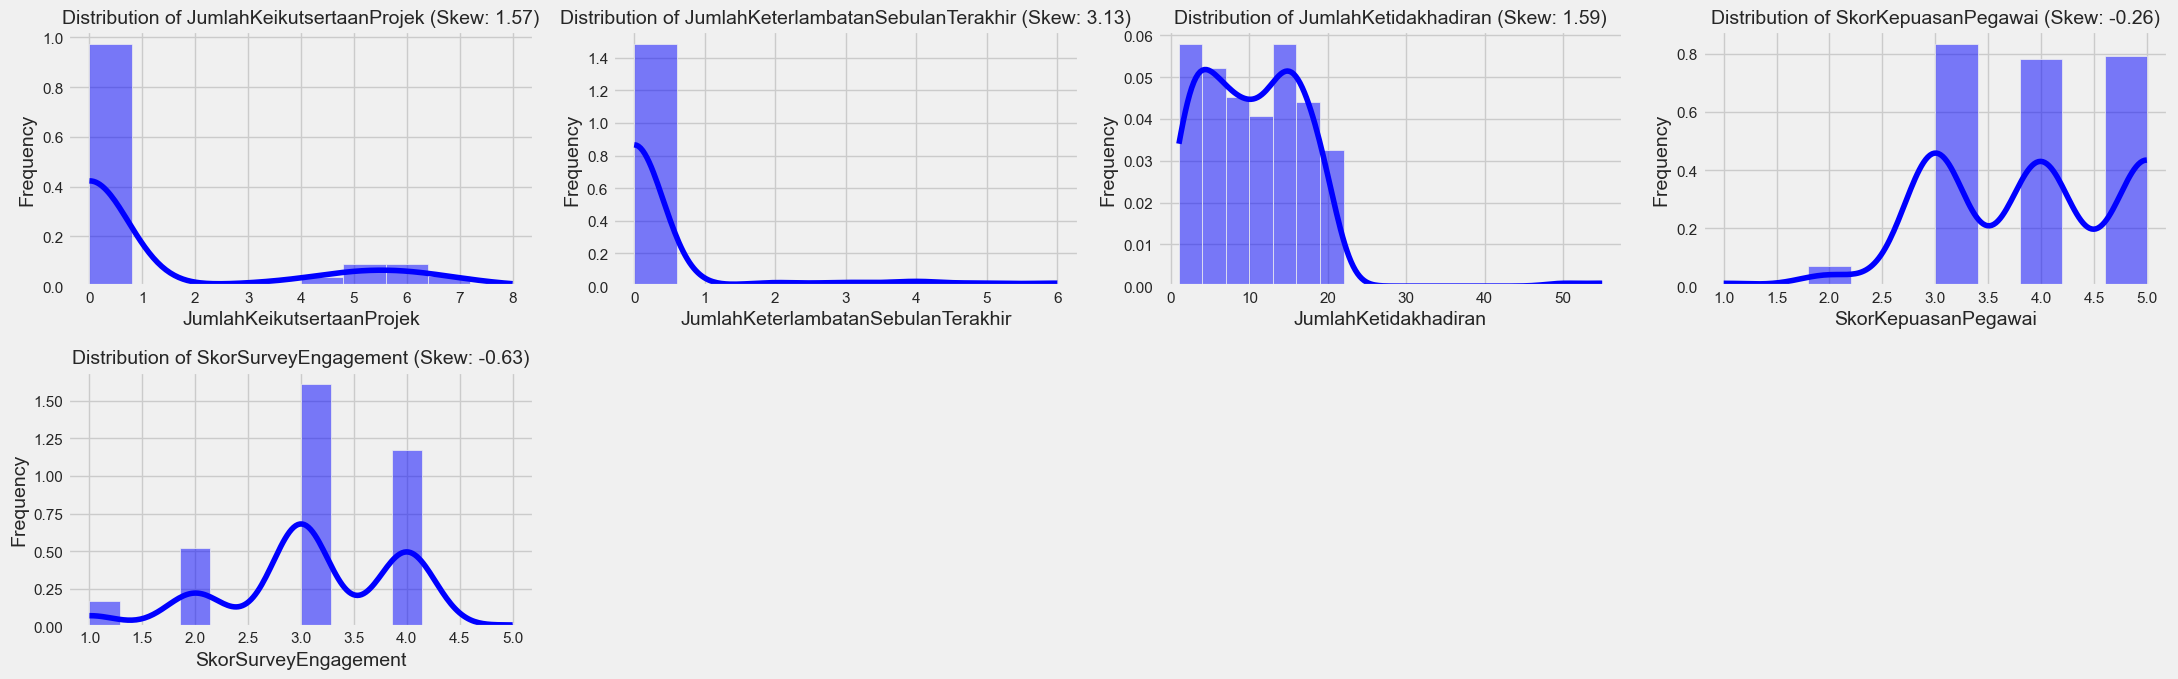

In [23]:
# 1. Check Skew Numerical Features

plt.figure(figsize=(22, 10))
for i in range(0, len(num)):
    plt.subplot(3, 4, i + 1)
    
    # Menghitung skewness
    skewness = df[num[i]].skew()
    
    # Plot distribusi dengan KDE
    sns.histplot(df[num[i]], color='blue', kde=True, stat='density')
    
    # Menambahkan label dan title
    plt.title(f'Distribution of {num[i]} (Skew: {skewness:.2f})', fontsize=14)
    plt.xlabel(num[i], fontsize=14)
    plt.ylabel('Frequency', fontsize=14)

plt.tight_layout()
plt.show()

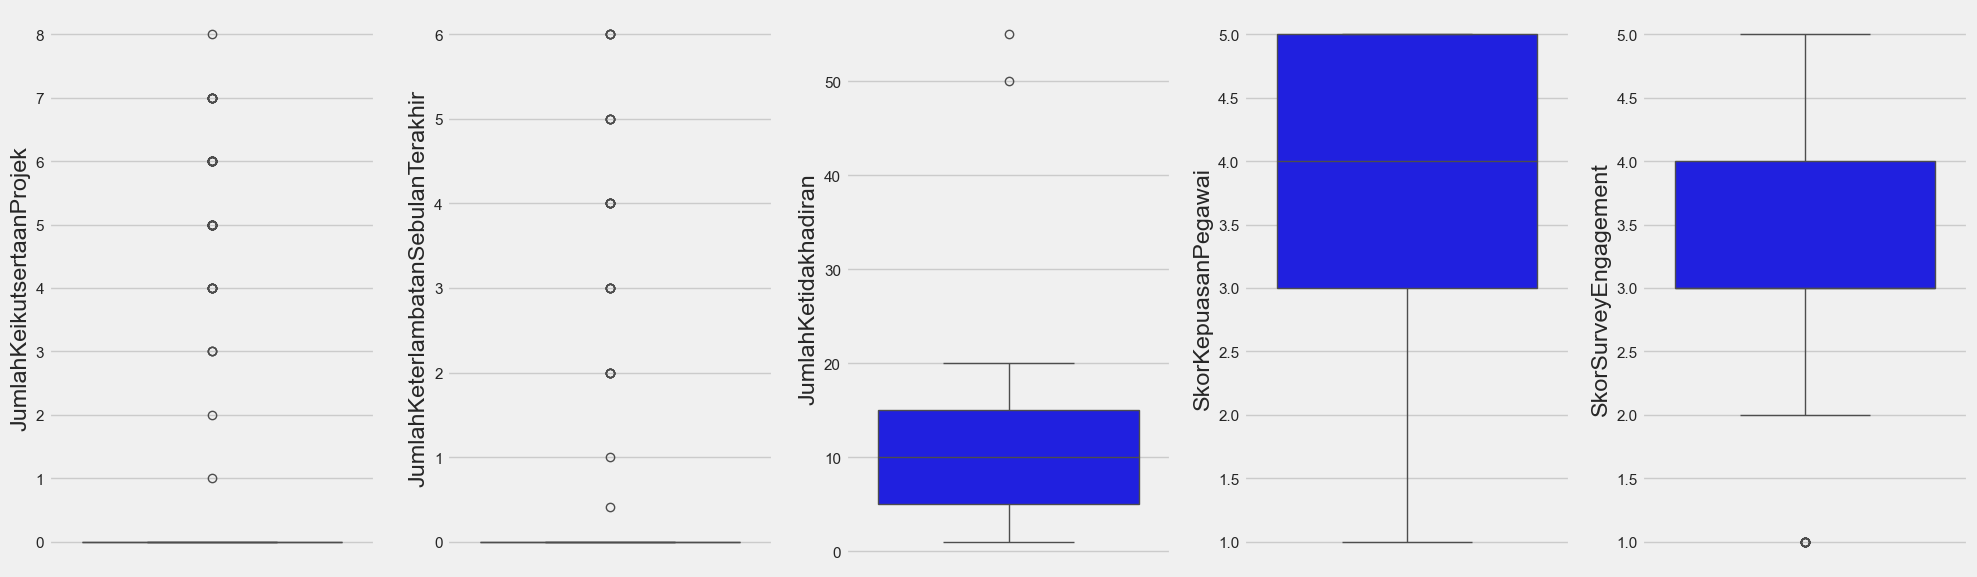

In [24]:
plt.figure(figsize=(20,6))
for i in range(0, len(num)):
    plt.subplot(1, len(num), i+1)
    sns.boxplot(y=df[num[i]], color='blue', orient='v')
    plt.tight_layout()

Berdasarkan 2 grafik diatas menunjukkan bahwa data skewed dan memiliki outlier, namun karena jumlah data sangat kecil dan data special sehingga jika dilakukan handling outlier akan mengalami kehilangan data yang cukup signifikan.  

## Handling Duplicate Data

In [27]:
duplicates_data = df.duplicated().sum()
print(f"Jumlah baris duplikat: {duplicates_data}")

Jumlah baris duplikat: 0


Data tidak memiliki data yang duplikat

## Handling Inconsistent Data

In [30]:
cats = ['StatusPernikahan', 'StatusKepegawaian', 'Pekerjaan', 'JenjangKarir', 'PerformancePegawai', 'AsalDaerah', 'HiringPlatform', 'TingkatPendidikan', 'PernahBekerja', 'AlasanResign']

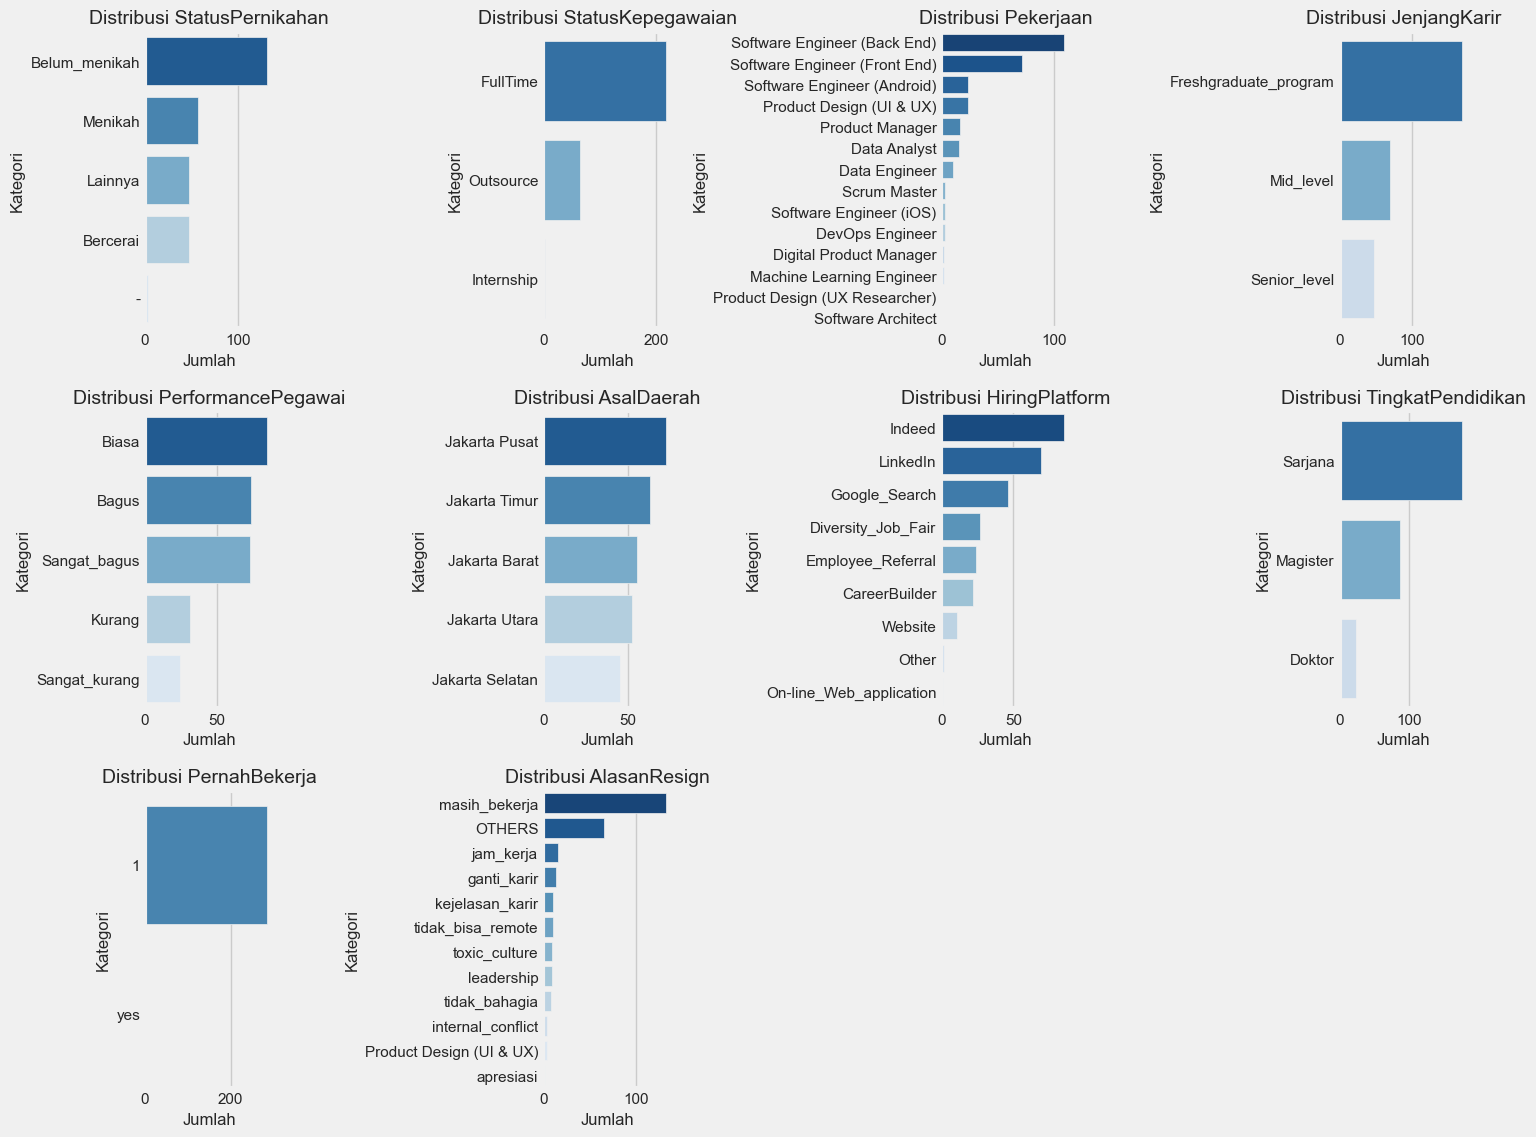

In [31]:

# Plot bar chart horizontal untuk setiap kolom kategori dalam list cat
plt.figure(figsize=(15, 15))  # Mengatur ukuran plot

for i in range(len(cats)):
    plt.subplot(4, 4, i + 1)  # Menentukan posisi subplot
    category_counts = df[cats[i]].value_counts()  # Menghitung frekuensi tiap kategori
    sns.barplot(y=category_counts.index, x=category_counts.values, palette='Blues_r', orient='h')  # Membuat bar chart horizontal
    plt.title(f'Distribusi {cats[i]}', fontsize=14)  # Menambahkan judul untuk setiap plot
    plt.ylabel('Kategori', fontsize=12)  # Menambahkan label untuk sumbu y
    plt.xlabel('Jumlah', fontsize=12)  # Menambahkan label untuk sumbu x

plt.tight_layout()  # Menyusun tata letak agar tidak saling bertumpuk
plt.show()  # Menampilkan plot

1. StatusPernikahan
    - Pada feature ini kategori "-" akan dilakukan merge dengan kategori lainnya
2. PernahBekerja
    - Merubah nilai 'yes' menjadi 0 dengan asumsi bahwa yang bernilai 1 = 'yes' sejumlah 286 dan yang bernilai 0 = 'no' sejumlah 1
3. AlasanResign
    - Kategori Product Design (UI & UX) akan dilakukan merge dengan kategori OTHERS

In [33]:
df['StatusPernikahan'] = df['StatusPernikahan'].replace('-', 'Lainnya')
df['PernahBekerja'] = df['PernahBekerja'].replace('yes', '0')
df['AlasanResign'] = df['AlasanResign'].replace('Product Design (UI & UX)', 'OTHERS')

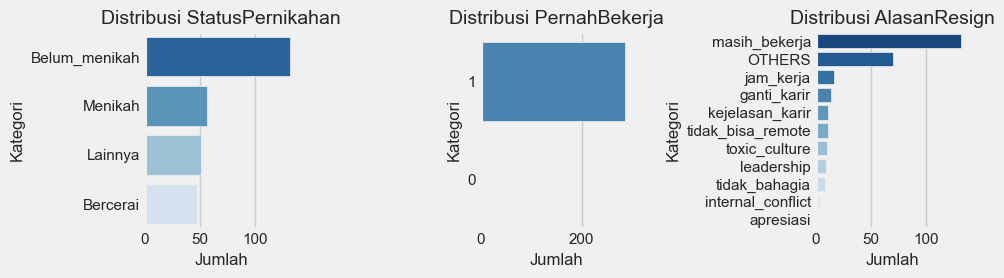

In [34]:
# Membuat list kolom yang telah diubah
cols = ['StatusPernikahan', 'PernahBekerja', 'AlasanResign']

# Plot bar chart horizontal untuk kolom yang diubah
plt.figure(figsize=(10, 3))

for i in range(len(cols)):
    plt.subplot(1, 3, i + 1)  # Menentukan posisi subplot (1 baris, 3 kolom)
    category_counts = df[cols[i]].value_counts()  # Menghitung frekuensi tiap kategori
    sns.barplot(y=category_counts.index, x=category_counts.values, palette='Blues_r', orient='h')  # Membuat bar chart horizontal
    plt.title(f'Distribusi {cols[i]}', fontsize=14)  # Menambahkan judul untuk setiap plot
    plt.ylabel('Kategori', fontsize=12)  # Menambahkan label untuk sumbu y
    plt.xlabel('Jumlah', fontsize=12)  # Menambahkan label untuk sumbu x

plt.tight_layout()  # Menyusun tata letak agar tidak saling bertumpuk
plt.show()  # Menampilkan plot

## Drop Kolom

In [36]:
# 1. Drop Kolom IkutProgramLOP
df.drop('IkutProgramLOP', axis=1, inplace=True, errors='ignore')

# 2. Drop Kolom NomorHP
df.drop('NomorHP', axis=1, inplace=True, errors='ignore')

# 3. Drop Kolom Email 
df.drop('Email', axis=1, inplace=True, errors='ignore')


In [37]:
df

,Username,EnterpriseID,StatusPernikahan,JenisKelamin,StatusKepegawaian,Pekerjaan,JenjangKarir,PerformancePegawai,AsalDaerah,HiringPlatform,SkorSurveyEngagement,SkorKepuasanPegawai,JumlahKeikutsertaanProjek,JumlahKeterlambatanSebulanTerakhir,JumlahKetidakhadiran,TingkatPendidikan,PernahBekerja,AlasanResign,TanggalLahir,TanggalHiring,TanggalPenilaianKaryawan,TanggalResign
0,spiritedPorpoise3,111065,Belum_menikah,Pria,Outsource,Software Engineer (Back End),Freshgraduate_program,Sangat_bagus,Jakarta Timur,Employee_Referral,4,4.0,0.0,0.0,9.0,Magister,1,masih_bekerja,1972-07-01,2011-01-10,2016-2-15,-
1,jealousGelding2,106080,Belum_menikah,Pria,FullTime,Data Analyst,Freshgraduate_program,Sangat_kurang,Jakarta Utara,Website,4,4.0,4.0,0.0,3.0,Sarjana,1,toxic_culture,1984-04-26,2014-01-06,2020-1-17,2018-6-16
2,pluckyMuesli3,106452,Menikah,Pria,FullTime,Software Engineer (Front End),Freshgraduate_program,Bagus,Jakarta Timur,Indeed,4,3.0,0.0,0.0,11.0,Magister,1,jam_kerja,1974-01-07,2011-01-10,2016-01-10,2014-9-24
3,stressedTruffle1,106325,Belum_menikah,Pria,Outsource,Software Engineer (Front End),Freshgraduate_program,Bagus,Jakarta Pusat,LinkedIn,3,3.0,0.0,4.0,6.0,Sarjana,1,masih_bekerja,1979-11-24,2014-2-17,2020-02-04,-
4,shyTermite7,111171,Belum_menikah,Wanita,FullTime,Product Manager,Freshgraduate_program,Bagus,Jakarta Timur,LinkedIn,3,3.0,0.0,0.0,11.0,Sarjana,1,ganti_karir,1974-11-07,2013-11-11,2020-1-22,2018-09-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282,dopeySheep0,106034,Belum_menikah,Wanita,FullTime,Data Engineer,Mid_level,Bagus,Jakarta Pusat,Google_Search,2,5.0,0.0,0.0,16.0,Sarjana,1,OTHERS,1973-12-08,2011-9-26,2016-03-01,-
283,yearningPorpoise4,106254,Lainnya,Wanita,FullTime,Product Design (UI & UX),Freshgraduate_program,Biasa,Jakarta Timur,LinkedIn,4,5.0,0.0,0.0,11.0,Sarjana,1,jam_kerja,1974-12-01,2013-5-13,2020-1-28,2017-11-15
284,murkySausage9,110433,Menikah,Wanita,FullTime,Software Engineer (Front End),Senior_level,Biasa,Jakarta Pusat,Diversity_Job_Fair,2,5.0,0.0,0.0,17.0,Sarjana,1,ganti_karir,1969-10-30,2013-11-11,2020-1-21,2018-06-08
285,truthfulMoth4,110744,Belum_menikah,Pria,FullTime,Software Engineer (Android),Mid_level,Bagus,Jakarta Utara,Google_Search,4,5.0,0.0,0.0,20.0,Sarjana,1,kejelasan_karir,1981-10-01,2011-5-16,2014-04-05,2018-04-01


## Feature Engineering

### Status Kerja

In [40]:
# Membuat kolom baru "StatusKerja"
#df['StatusKerja'] = df['TanggalResign'].apply(lambda x: 'Masih Bekerja' if x == '-' or pd.isnull(x) else 'Tidak Bekerja')
# Asumsi :
#    1. Masih Kerja = 1
#    2. Tidak Kerja/Resign = 0

#df['StatusKerja'] = df['TanggalResign'].apply(lambda x: 1 if pd.isnull(x) else 0)
df['StatusKerja'] = df['TanggalResign'].apply(lambda x: 1 if x == '-' or pd.isnull(x) else 0)

In [41]:
df

,Username,EnterpriseID,StatusPernikahan,JenisKelamin,StatusKepegawaian,Pekerjaan,JenjangKarir,PerformancePegawai,AsalDaerah,HiringPlatform,SkorSurveyEngagement,SkorKepuasanPegawai,JumlahKeikutsertaanProjek,JumlahKeterlambatanSebulanTerakhir,JumlahKetidakhadiran,TingkatPendidikan,PernahBekerja,AlasanResign,TanggalLahir,TanggalHiring,TanggalPenilaianKaryawan,TanggalResign,StatusKerja
0,spiritedPorpoise3,111065,Belum_menikah,Pria,Outsource,Software Engineer (Back End),Freshgraduate_program,Sangat_bagus,Jakarta Timur,Employee_Referral,4,4.0,0.0,0.0,9.0,Magister,1,masih_bekerja,1972-07-01,2011-01-10,2016-2-15,-,1
1,jealousGelding2,106080,Belum_menikah,Pria,FullTime,Data Analyst,Freshgraduate_program,Sangat_kurang,Jakarta Utara,Website,4,4.0,4.0,0.0,3.0,Sarjana,1,toxic_culture,1984-04-26,2014-01-06,2020-1-17,2018-6-16,0
2,pluckyMuesli3,106452,Menikah,Pria,FullTime,Software Engineer (Front End),Freshgraduate_program,Bagus,Jakarta Timur,Indeed,4,3.0,0.0,0.0,11.0,Magister,1,jam_kerja,1974-01-07,2011-01-10,2016-01-10,2014-9-24,0
3,stressedTruffle1,106325,Belum_menikah,Pria,Outsource,Software Engineer (Front End),Freshgraduate_program,Bagus,Jakarta Pusat,LinkedIn,3,3.0,0.0,4.0,6.0,Sarjana,1,masih_bekerja,1979-11-24,2014-2-17,2020-02-04,-,1
4,shyTermite7,111171,Belum_menikah,Wanita,FullTime,Product Manager,Freshgraduate_program,Bagus,Jakarta Timur,LinkedIn,3,3.0,0.0,0.0,11.0,Sarjana,1,ganti_karir,1974-11-07,2013-11-11,2020-1-22,2018-09-06,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282,dopeySheep0,106034,Belum_menikah,Wanita,FullTime,Data Engineer,Mid_level,Bagus,Jakarta Pusat,Google_Search,2,5.0,0.0,0.0,16.0,Sarjana,1,OTHERS,1973-12-08,2011-9-26,2016-03-01,-,1
283,yearningPorpoise4,106254,Lainnya,Wanita,FullTime,Product Design (UI & UX),Freshgraduate_program,Biasa,Jakarta Timur,LinkedIn,4,5.0,0.0,0.0,11.0,Sarjana,1,jam_kerja,1974-12-01,2013-5-13,2020-1-28,2017-11-15,0
284,murkySausage9,110433,Menikah,Wanita,FullTime,Software Engineer (Front End),Senior_level,Biasa,Jakarta Pusat,Diversity_Job_Fair,2,5.0,0.0,0.0,17.0,Sarjana,1,ganti_karir,1969-10-30,2013-11-11,2020-1-21,2018-06-08,0
285,truthfulMoth4,110744,Belum_menikah,Pria,FullTime,Software Engineer (Android),Mid_level,Bagus,Jakarta Utara,Google_Search,4,5.0,0.0,0.0,20.0,Sarjana,1,kejelasan_karir,1981-10-01,2011-5-16,2014-04-05,2018-04-01,0


In [42]:
status_kerja_count = df['StatusKerja'].value_counts()

print(status_kerja_count)

StatusKerja
1    198
0     89
Name: count, dtype: int64


dari hasil jumlah masih bekerja 68.98% sementara yang tidak bekerja 31.01% artinya kelas tidak seimbang untuk bisnis metriks dapat menggunakan F1/recall. yang masih bekerja jangan sampai resign/turnover bagaimana caranya ? lihat FP dan FN nya.  

### Tahun Hiring dan Resign

In [45]:
# Mengonversi TanggalHiring menjadi datetime
df['TanggalHiring'] = pd.to_datetime(df['TanggalHiring'])

# Membuat kolom terpisah untuk tanggal, bulan, dan tahun
df['Tanggal_Hiring'] = df['TanggalHiring'].dt.day
df['Bulan_Hiring'] = df['TanggalHiring'].dt.month
df['Tahun_Hiring'] = df['TanggalHiring'].dt.year

# Mengonversi TanggalResign menjadi datetime, dengan error handling
df['TanggalResign'] = pd.to_datetime(df['TanggalResign'], errors='coerce')

# Memeriksa nilai yang tidak dapat diparse
#print("Nilai yang tidak valid:", df[df['TanggalResign'].isna()])

# Membuat kolom terpisah untuk tanggal, bulan, dan tahun
df['Tanggal_Resign'] = df['TanggalResign'].dt.day
df['Bulan_Resign'] = df['TanggalResign'].dt.month
df['Tahun_Resign'] = df['TanggalResign'].dt.year.astype('Int32')

### Age of Employee

In [47]:
# Mengonversi TanggalLahir menjadi datetime
df['TanggalLahir'] = pd.to_datetime(df['TanggalLahir'])

# Mendapatkan tanggal saat ini
tanggal_saat_ini = datetime.now()

# Menghitung umur karyawan
df['Umur'] = tanggal_saat_ini.year - df['TanggalLahir'].dt.year

# Menyesuaikan jika karyawan belum berulang tahun pada tahun ini
#df['Belum_Berulang_Tahun'] = (tanggal_saat_ini.month < df['TanggalLahir'].dt.month) | \
 #                            ((tanggal_saat_ini.month == df['TanggalLahir'].dt.month) & (tanggal_saat_ini.day < df['TanggalLahir'].dt.day))

# Mengurangi umur jika belum berulang tahun tahun ini
#df['Umur'] -= df['Belum_Berulang_Tahun'].astype(int)

### Durasi Jabatan 

In [49]:
df['TanggalPenilaianKaryawan'] = pd.to_datetime(df['TanggalPenilaianKaryawan'])
df['TanggalHiring'] = pd.to_datetime(df['TanggalHiring'])

# Menghitung lama menjabat dalam tahun
df['DurasiJabatan'] = round((df['TanggalPenilaianKaryawan'] - df['TanggalHiring']).dt.days / 365)


### Lama Bekerja

In [51]:
# Membuat kolom baru "Lama Bekerja"
current_date = datetime.now()
df['LamaBekerja'] = df.apply(
    lambda row: (row['TanggalResign'] if pd.notnull(row['TanggalResign']) else current_date) - row['TanggalHiring'], 
    axis=1
)

# Mengubah hasil menjadi jumlah tahun
df['LamaBekerja'] = df['LamaBekerja'].dt.days // 365  # Menghitung lama bekerja dalam tahun

### Skor Kinerja Total 

Skor Kinerja Total digunakan untuk memberikan gambaran komprehensif mengenai kinerja karyawan dengan menggabungkan dua aspek penting:

Skor Survey Engagement: Mengukur seberapa terlibat dan puas karyawan dengan pekerjaan mereka, lingkungan kerja, dan budaya perusahaan. Ini bisa mencerminkan motivasi dan kepuasan kerja.

Skor Kepuasan Pegawai: Menggambarkan sejauh mana karyawan merasa puas dengan berbagai aspek pekerjaan mereka, seperti kompensasi, tunjangan, manajemen, dan kesempatan untuk berkembang.

Manfaat Skor Kinerja Total:
- Analisis Kinerja: Memungkinkan perusahaan untuk menilai karyawan secara keseluruhan, bukan hanya dari satu aspek.
- Retensi Karyawan: Dapat membantu mengidentifikasi karyawan yang mungkin berisiko resign dan perlu perhatian lebih.
- Pengembangan Karyawan: Membantu dalam merancang program pelatihan atau intervensi yang dapat meningkatkan kepuasan dan keterlibatan.
- Pengambilan Keputusan: Memberikan data yang lebih baik untuk pengambilan keputusan terkait promosi, penghargaan, atau penugasan proyek.
Dengan memiliki Skor Kinerja Total, manajemen dapat lebih memahami faktor-faktor yang memengaruhi kinerja karyawan dan menciptakan strategi untuk meningkatkan produktivitas dan retensi.

In [54]:
# Menambahkan kolom Rata-rata Skor Kinerja Total
df['Rata-rata Skor Kinerja Total'] = (df['SkorSurveyEngagement'] + df['SkorKepuasanPegawai']) / 2

In [55]:
# Menambahkan kondisi untuk menghindari pembagian dengan nol
df['JumlahKetidakhadiranPerTahun'] = df.apply(
    lambda x: x['JumlahKetidakhadiran'] / x['DurasiJabatan'] if x['DurasiJabatan'] > 0 else 0,
    axis=1
)

In [56]:
df

,Username,EnterpriseID,StatusPernikahan,JenisKelamin,StatusKepegawaian,Pekerjaan,JenjangKarir,PerformancePegawai,AsalDaerah,HiringPlatform,SkorSurveyEngagement,SkorKepuasanPegawai,JumlahKeikutsertaanProjek,JumlahKeterlambatanSebulanTerakhir,JumlahKetidakhadiran,TingkatPendidikan,PernahBekerja,AlasanResign,TanggalLahir,TanggalHiring,TanggalPenilaianKaryawan,TanggalResign,StatusKerja,Tanggal_Hiring,Bulan_Hiring,Tahun_Hiring,Tanggal_Resign,Bulan_Resign,Tahun_Resign,Umur,DurasiJabatan,LamaBekerja,Rata-rata Skor Kinerja Total,JumlahKetidakhadiranPerTahun
0,spiritedPorpoise3,111065,Belum_menikah,Pria,Outsource,Software Engineer (Back End),Freshgraduate_program,Sangat_bagus,Jakarta Timur,Employee_Referral,4,4.0,0.0,0.0,9.0,Magister,1,masih_bekerja,1972-07-01,2011-01-10,2016-02-15,NaT,1,10,1,2011,NaN,NaN,<NA>,52,5.0,13,4.0,1.800000
1,jealousGelding2,106080,Belum_menikah,Pria,FullTime,Data Analyst,Freshgraduate_program,Sangat_kurang,Jakarta Utara,Website,4,4.0,4.0,0.0,3.0,Sarjana,1,toxic_culture,1984-04-26,2014-01-06,2020-01-17,2018-06-16,0,6,1,2014,16.0,6.0,2018,40,6.0,4,4.0,0.500000
2,pluckyMuesli3,106452,Menikah,Pria,FullTime,Software Engineer (Front End),Freshgraduate_program,Bagus,Jakarta Timur,Indeed,4,3.0,0.0,0.0,11.0,Magister,1,jam_kerja,1974-01-07,2011-01-10,2016-01-10,2014-09-24,0,10,1,2011,24.0,9.0,2014,50,5.0,3,3.5,2.200000
3,stressedTruffle1,106325,Belum_menikah,Pria,Outsource,Software Engineer (Front End),Freshgraduate_program,Bagus,Jakarta Pusat,LinkedIn,3,3.0,0.0,4.0,6.0,Sarjana,1,masih_bekerja,1979-11-24,2014-02-17,2020-02-04,NaT,1,17,2,2014,NaN,NaN,<NA>,45,6.0,10,3.0,1.000000
4,shyTermite7,111171,Belum_menikah,Wanita,FullTime,Product Manager,Freshgraduate_program,Bagus,Jakarta Timur,LinkedIn,3,3.0,0.0,0.0,11.0,Sarjana,1,ganti_karir,1974-11-07,2013-11-11,2020-01-22,2018-09-06,0,11,11,2013,6.0,9.0,2018,50,6.0,4,3.0,1.833333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282,dopeySheep0,106034,Belum_menikah,Wanita,FullTime,Data Engineer,Mid_level,Bagus,Jakarta Pusat,Google_Search,2,5.0,0.0,0.0,16.0,Sarjana,1,OTHERS,1973-12-08,2011-09-26,2016-03-01,NaT,1,26,9,2011,NaN,NaN,<NA>,51,4.0,13,3.5,4.000000
283,yearningPorpoise4,106254,Lainnya,Wanita,FullTime,Product Design (UI & UX),Freshgraduate_program,Biasa,Jakarta Timur,LinkedIn,4,5.0,0.0,0.0,11.0,Sarjana,1,jam_kerja,1974-12-01,2013-05-13,2020-01-28,2017-11-15,0,13,5,2013,15.0,11.0,2017,50,7.0,4,4.5,1.571429
284,murkySausage9,110433,Menikah,Wanita,FullTime,Software Engineer (Front End),Senior_level,Biasa,Jakarta Pusat,Diversity_Job_Fair,2,5.0,0.0,0.0,17.0,Sarjana,1,ganti_karir,1969-10-30,2013-11-11,2020-01-21,2018-06-08,0,11,11,2013,8.0,6.0,2018,55,6.0,4,3.5,2.833333
285,truthfulMoth4,110744,Belum_menikah,Pria,FullTime,Software Engineer (Android),Mid_level,Bagus,Jakarta Utara,Google_Search,4,5.0,0.0,0.0,20.0,Sarjana,1,kejelasan_karir,1981-10-01,2011-05-16,2014-04-05,2018-04-01,0,16,5,2011,1.0,4.0,2018,43,3.0,6,4.5,6.666667


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287 entries, 0 to 286
Data columns (total 34 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   Username                            287 non-null    object        
 1   EnterpriseID                        287 non-null    int64         
 2   StatusPernikahan                    287 non-null    object        
 3   JenisKelamin                        287 non-null    object        
 4   StatusKepegawaian                   287 non-null    object        
 5   Pekerjaan                           287 non-null    object        
 6   JenjangKarir                        287 non-null    object        
 7   PerformancePegawai                  287 non-null    object        
 8   AsalDaerah                          287 non-null    object        
 9   HiringPlatform                      287 non-null    object        
 10  SkorSurveyEngagement      

1. Buatlah dua tabel agregat yang menghitung jumlah karyawan yang masuk dan keluar berdasarkan tahun hiring dan tahun resign (Hint: Convert tahun hiring dan resign dari fitur TanggalHiring dan TanggalResign) 

In [59]:
# Misalkan df adalah DataFrame yang berisi data karyawan
df['TanggalHiring'] = pd.to_datetime(df['TanggalHiring'])
df['TanggalResign'] = pd.to_datetime(df['TanggalResign'])

# Membuat kolom tahun
df['TahunHiring'] = df['TanggalHiring'].dt.year
df['TahunResign'] = df['TanggalResign'].dt.year

# Tabel agregat untuk hiring
hiring_count = df.groupby('TahunHiring').size().reset_index(name='JumlahMasuk').astype(int)

# Tabel agregat untuk resign
resign_count = df.groupby('TahunResign').size().reset_index(name='JumlahKeluar').astype(int)

# Join kedua tabel
merged_data = pd.merge(hiring_count, resign_count, left_on='TahunHiring', right_on='TahunResign', how='outer')
merged_data = merged_data.fillna(0)  # Mengisi NaN dengan 0

# Imputation untuk tahun yang kosong
merged_data['TahunHiring'] = merged_data['TahunHiring'].fillna(method='ffill')
merged_data['TahunResign'] = merged_data['TahunResign'].fillna(method='ffill')

# Menghitung total resign, total karyawan, yang masih bertahan, dan perubahan
merged_data['TotalResign'] = merged_data['JumlahKeluar'].cumsum().astype(int)
merged_data['TotalKaryawan'] = merged_data['JumlahMasuk'].cumsum().astype(int)
merged_data['MasihBertahan'] = merged_data['TotalKaryawan'] - merged_data['TotalResign'].astype(int)
merged_data['Perubahan'] = merged_data['MasihBertahan'].diff().fillna(0).astype(int)

# Menyusun tabel akhir
final_table = merged_data[['TahunHiring', 'JumlahMasuk', 'JumlahKeluar', 
                            'TotalResign', 'TotalKaryawan', 'MasihBertahan', 'Perubahan']]
final_table.rename(columns={'TahunHiring': 'Tahun'}, inplace=True)

# Mengganti angka nol di kolom Tahun
final_table['Tahun'] = final_table['Tahun'].replace({0: 2019, 0: 2020}).astype(int)

# Mengubah tahun 2019 untuk baris tertentu jika diperlukan
final_table.loc[final_table.index[13], 'Tahun'] = 2019

# Mengatur lebar tampilan kolom
pd.set_option('display.expand_frame_repr', False)  # Memastikan tabel tidak dipotong

# Menampilkan tabel
print(final_table)

    Tahun  JumlahMasuk  JumlahKeluar  TotalResign  TotalKaryawan  MasihBertahan  Perubahan
0    2006          1.0           0.0            0              1              1          0
1    2007          2.0           0.0            0              3              3          2
2    2008          2.0           0.0            0              5              5          2
3    2009          7.0           0.0            0             12             12          7
4    2010          8.0           0.0            0             20             20          8
5    2011         76.0           0.0            0             96             96         76
6    2012         41.0           0.0            0            137            137         41
7    2013         43.0           5.0            5            180            175         38
8    2014         56.0          12.0           17            236            219         44
9    2015         31.0           8.0           25            267            242         23

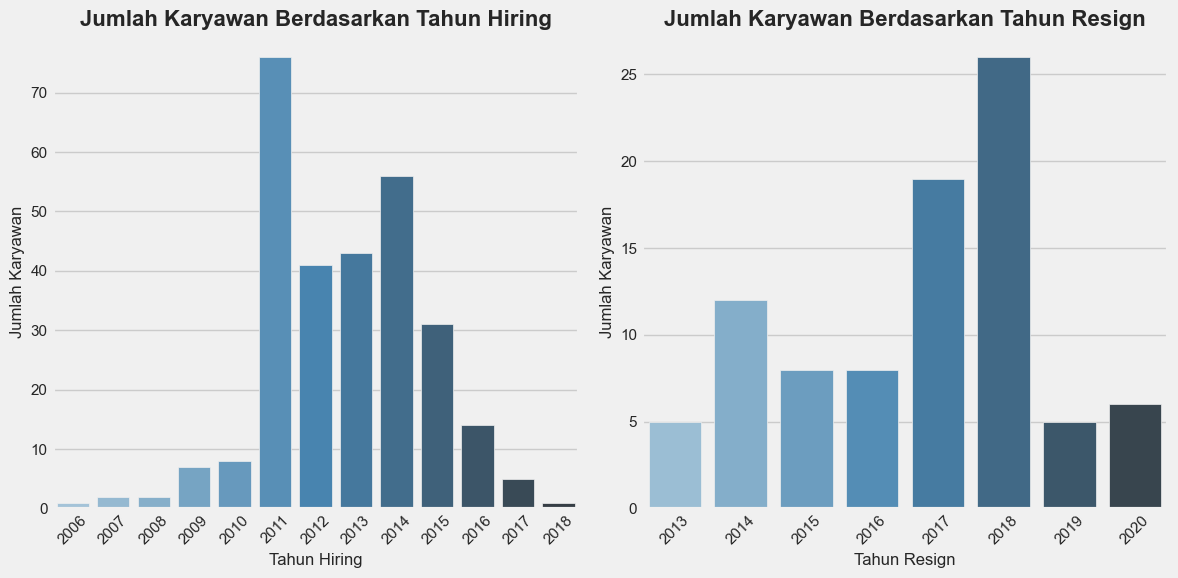

In [60]:
# Menghitung jumlah karyawan berdasarkan tahun hiring
jumlah_karyawan_per_tahun_hiring = df.groupby('Tahun_Hiring').size().reset_index(name='JumlahKaryawan')
# Menghitung jumlah karyawan berdasarkan tahun resign
jumlah_karyawan_per_tahun_resign = df.groupby('Tahun_Resign').size().reset_index(name='JumlahKaryawan')

# Membuat subplot
plt.figure(figsize=(12, 6))

# Barplot untuk Tahun Hiring
plt.subplot(1, 2, 1)
sns.barplot(x='Tahun_Hiring', y='JumlahKaryawan', data=jumlah_karyawan_per_tahun_hiring, palette='Blues_d')
plt.title('Jumlah Karyawan Berdasarkan Tahun Hiring', fontsize=16,  fontweight='bold')
plt.xlabel('Tahun Hiring', fontsize=12)
plt.ylabel('Jumlah Karyawan', fontsize=12)
plt.xticks(rotation=45)

# Barplot untuk Tahun Resign
plt.subplot(1, 2, 2)
sns.barplot(x='Tahun_Resign', y='JumlahKaryawan', data=jumlah_karyawan_per_tahun_resign, palette='Blues_d')
plt.title('Jumlah Karyawan Berdasarkan Tahun Resign', fontsize=16,  fontweight='bold')
plt.xlabel('Tahun Resign', fontsize=12)
plt.ylabel('Jumlah Karyawan', fontsize=12)
plt.xticks(rotation=45)

# Menyesuaikan layout
plt.tight_layout()
# Tampilkan grafik
plt.show()

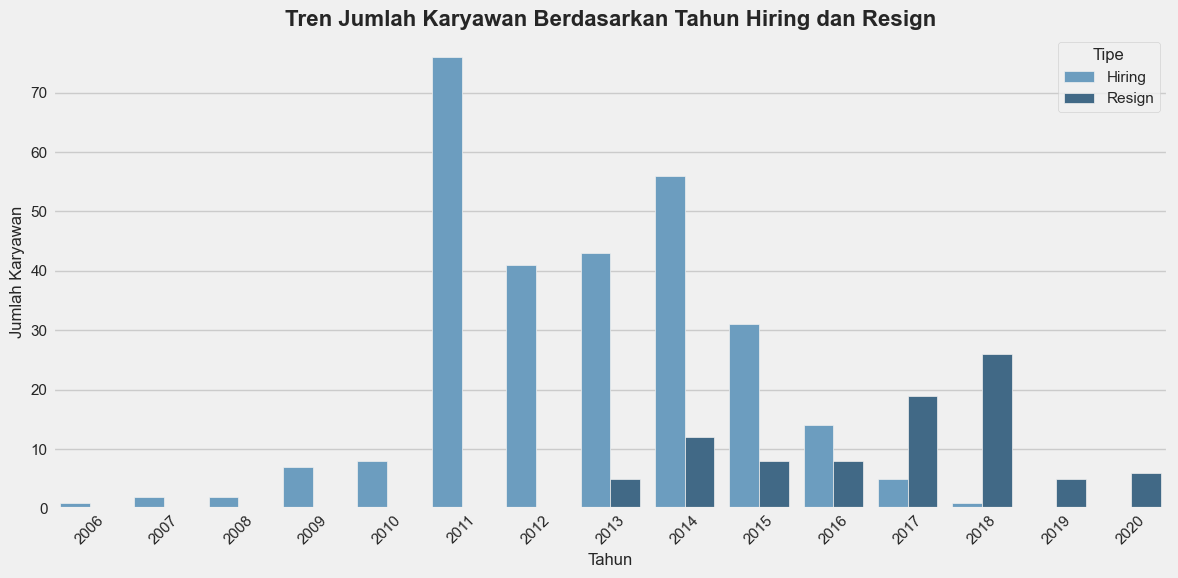

In [61]:
# Menghitung jumlah karyawan berdasarkan tahun hiring
jumlah_karyawan_hiring = df.groupby('Tahun_Hiring').size().reset_index(name='JumlahKaryawan')
jumlah_karyawan_hiring['Tipe'] = 'Hiring'

# Menghitung jumlah karyawan berdasarkan tahun resign
jumlah_karyawan_resign = df.groupby('Tahun_Resign').size().reset_index(name='JumlahKaryawan')
jumlah_karyawan_resign['Tipe'] = 'Resign'

# Menggabungkan kedua DataFrame
jumlah_karyawan = pd.concat([jumlah_karyawan_hiring.rename(columns={'Tahun_Hiring': 'Tahun'}), 
                              jumlah_karyawan_resign.rename(columns={'Tahun_Resign': 'Tahun'})])

# Visualisasi menggunakan barplot
plt.figure(figsize=(12, 6))
sns.barplot(x='Tahun', y='JumlahKaryawan', hue='Tipe', data=jumlah_karyawan, palette='Blues_d')

# Menambahkan judul dan label
plt.title('Tren Jumlah Karyawan Berdasarkan Tahun Hiring dan Resign', fontsize=16,  fontweight='bold')
plt.xlabel('Tahun', fontsize=12)
plt.ylabel('Jumlah Karyawan', fontsize=12)

# Memutar label sumbu x jika diperlukan
plt.xticks(rotation=45)

# Tampilkan grafik
plt.tight_layout()
plt.show()

Berdasarkan Grafik Tren Jumlah Karyawan : 
1. Pada tahun 2006-2011 , selama 5 tahun perusahaan sedang bertumbuh diindikasikan dengan penambahan karyawan setiap tahunnya dan recrutment ini yang paling besar berada di tahun ke 5 yaitu 2011. 
2. recruitment ini menurun di tahun ke 6 yaitu tahun 2012. dan meningkat kembali pada tahun 2013 tapi diiringi dengan jumlah karyawan yang resign. penambhana karyawan dari tahun 2012-2013 hanya 2 orang saja sementara yang keluar 5 orang. artinya perusahaan mulai mengalami kekurangan orang sebanyak 3 orang. 
4. Pada tahun 2014 hingga 2018 proses recruitment berangsur menurun, dan diikuti dengan jumlah karyawan yang resign meningkat dan puncaknya berada pada tahun 2018, dan kembali menurun hingga tahun 2020.

kesimpulan : Dari hasil pemaparan diatas, dalam 5 tahun terakhir perusahaan sedang mengalami banyak karyawan yang resign namun tidak diikuti dengan penambahan jumlah karyawan. hal ini akna sangat berpengaruh terhadap stabilitas perusahaan. oleh karena itu langkah yang dapat diambil perusahaan adalah :

1. 
2. 
3. 


Jumlah karyawan yang bertahan di divisi masing-masing


In [64]:
# Misalkan df adalah DataFrame dengan kolom 'Divisi', 'TanggalHiring', dan 'TanggalResign'
# Mengonversi kolom tanggal menjadi tipe datetime
df['TanggalHiring'] = pd.to_datetime(df['TanggalHiring'])
df['TanggalResign'] = pd.to_datetime(df['TanggalResign'])

# Membuat kolom tahun dan karyawan yang masih bertahan
df['TahunHiring'] = df['TanggalHiring'].dt.year
df['TahunResign'] = df['TanggalResign'].dt.year

# Mengelompokkan data berdasarkan divisi dan menghitung jumlah masuk dan keluar
divisi_group = df.groupby('Pekerjaan').agg(
    JumlahMasuk=('TanggalHiring', 'count'),
    JumlahKeluar=('TanggalResign', 'count')
).reset_index()

# Menghitung jumlah karyawan yang bertahan di setiap divisi
divisi_group['MasihBertahan'] = divisi_group['JumlahMasuk'] - divisi_group['JumlahKeluar']

# Menghitung persentase pengurangan karyawan
divisi_group['PersentasePengurangan'] = (divisi_group['JumlahKeluar'] / divisi_group['JumlahMasuk']) * 100

# Menampilkan hasil
print(divisi_group)

                         Pekerjaan  JumlahMasuk  JumlahKeluar  MasihBertahan  PersentasePengurangan
0                     Data Analyst           16             8              8              50.000000
1                    Data Engineer           10             3              7              30.000000
2                  DevOps Engineer            3             0              3               0.000000
3          Digital Product Manager            2             0              2               0.000000
4        Machine Learning Engineer            2             0              2               0.000000
5         Product Design (UI & UX)           24             9             15              37.500000
6   Product Design (UX Researcher)            1             0              1               0.000000
7                  Product Manager           17             6             11              35.294118
8                     Scrum Master            3             0              3               0.000000


In [65]:
df

,Username,EnterpriseID,StatusPernikahan,JenisKelamin,StatusKepegawaian,Pekerjaan,JenjangKarir,PerformancePegawai,AsalDaerah,HiringPlatform,SkorSurveyEngagement,SkorKepuasanPegawai,JumlahKeikutsertaanProjek,JumlahKeterlambatanSebulanTerakhir,JumlahKetidakhadiran,TingkatPendidikan,PernahBekerja,AlasanResign,TanggalLahir,TanggalHiring,TanggalPenilaianKaryawan,TanggalResign,StatusKerja,Tanggal_Hiring,Bulan_Hiring,Tahun_Hiring,Tanggal_Resign,Bulan_Resign,Tahun_Resign,Umur,DurasiJabatan,LamaBekerja,Rata-rata Skor Kinerja Total,JumlahKetidakhadiranPerTahun,TahunHiring,TahunResign
0,spiritedPorpoise3,111065,Belum_menikah,Pria,Outsource,Software Engineer (Back End),Freshgraduate_program,Sangat_bagus,Jakarta Timur,Employee_Referral,4,4.0,0.0,0.0,9.0,Magister,1,masih_bekerja,1972-07-01,2011-01-10,2016-02-15,NaT,1,10,1,2011,NaN,NaN,<NA>,52,5.0,13,4.0,1.800000,2011,NaN
1,jealousGelding2,106080,Belum_menikah,Pria,FullTime,Data Analyst,Freshgraduate_program,Sangat_kurang,Jakarta Utara,Website,4,4.0,4.0,0.0,3.0,Sarjana,1,toxic_culture,1984-04-26,2014-01-06,2020-01-17,2018-06-16,0,6,1,2014,16.0,6.0,2018,40,6.0,4,4.0,0.500000,2014,2018.0
2,pluckyMuesli3,106452,Menikah,Pria,FullTime,Software Engineer (Front End),Freshgraduate_program,Bagus,Jakarta Timur,Indeed,4,3.0,0.0,0.0,11.0,Magister,1,jam_kerja,1974-01-07,2011-01-10,2016-01-10,2014-09-24,0,10,1,2011,24.0,9.0,2014,50,5.0,3,3.5,2.200000,2011,2014.0
3,stressedTruffle1,106325,Belum_menikah,Pria,Outsource,Software Engineer (Front End),Freshgraduate_program,Bagus,Jakarta Pusat,LinkedIn,3,3.0,0.0,4.0,6.0,Sarjana,1,masih_bekerja,1979-11-24,2014-02-17,2020-02-04,NaT,1,17,2,2014,NaN,NaN,<NA>,45,6.0,10,3.0,1.000000,2014,NaN
4,shyTermite7,111171,Belum_menikah,Wanita,FullTime,Product Manager,Freshgraduate_program,Bagus,Jakarta Timur,LinkedIn,3,3.0,0.0,0.0,11.0,Sarjana,1,ganti_karir,1974-11-07,2013-11-11,2020-01-22,2018-09-06,0,11,11,2013,6.0,9.0,2018,50,6.0,4,3.0,1.833333,2013,2018.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282,dopeySheep0,106034,Belum_menikah,Wanita,FullTime,Data Engineer,Mid_level,Bagus,Jakarta Pusat,Google_Search,2,5.0,0.0,0.0,16.0,Sarjana,1,OTHERS,1973-12-08,2011-09-26,2016-03-01,NaT,1,26,9,2011,NaN,NaN,<NA>,51,4.0,13,3.5,4.000000,2011,NaN
283,yearningPorpoise4,106254,Lainnya,Wanita,FullTime,Product Design (UI & UX),Freshgraduate_program,Biasa,Jakarta Timur,LinkedIn,4,5.0,0.0,0.0,11.0,Sarjana,1,jam_kerja,1974-12-01,2013-05-13,2020-01-28,2017-11-15,0,13,5,2013,15.0,11.0,2017,50,7.0,4,4.5,1.571429,2013,2017.0
284,murkySausage9,110433,Menikah,Wanita,FullTime,Software Engineer (Front End),Senior_level,Biasa,Jakarta Pusat,Diversity_Job_Fair,2,5.0,0.0,0.0,17.0,Sarjana,1,ganti_karir,1969-10-30,2013-11-11,2020-01-21,2018-06-08,0,11,11,2013,8.0,6.0,2018,55,6.0,4,3.5,2.833333,2013,2018.0
285,truthfulMoth4,110744,Belum_menikah,Pria,FullTime,Software Engineer (Android),Mid_level,Bagus,Jakarta Utara,Google_Search,4,5.0,0.0,0.0,20.0,Sarjana,1,kejelasan_karir,1981-10-01,2011-05-16,2014-04-05,2018-04-01,0,16,5,2011,1.0,4.0,2018,43,3.0,6,4.5,6.666667,2011,2018.0


In [66]:
# Mengonversi kolom tanggal menjadi tipe datetime
df['TanggalHiring'] = pd.to_datetime(df['TanggalHiring'])
df['TanggalResign'] = pd.to_datetime(df['TanggalResign'], errors='coerce')  # Mengubah NaN menjadi Tanggal

# Menghitung jumlah karyawan yang masih aktif per pekerjaan
today = pd.Timestamp.now()
karyawan_aktif = df[(df['TanggalResign'].isnull()) | (df['TanggalResign'] > today)]

# Menghitung jumlah karyawan yang masih aktif per pekerjaan
jumlah_aktif_per_pekerjaan = karyawan_aktif.groupby('Pekerjaan').size().reset_index(name='JumlahMasihAda')

# Mengurutkan hasil dari yang terkecil ke yang terbesar
jumlah_aktif_per_pekerjaan = jumlah_aktif_per_pekerjaan.sort_values(by='JumlahMasihAda')

# Menampilkan hasil
print(jumlah_aktif_per_pekerjaan)

                         Pekerjaan  JumlahMasihAda
6   Product Design (UX Researcher)               1
9               Software Architect               1
3          Digital Product Manager               2
4        Machine Learning Engineer               2
2                  DevOps Engineer               3
8                     Scrum Master               3
13         Software Engineer (iOS)               3
1                    Data Engineer               7
0                     Data Analyst               8
7                  Product Manager              11
5         Product Design (UI & UX)              15
10     Software Engineer (Android)              17
12   Software Engineer (Front End)              44
11    Software Engineer (Back End)              81


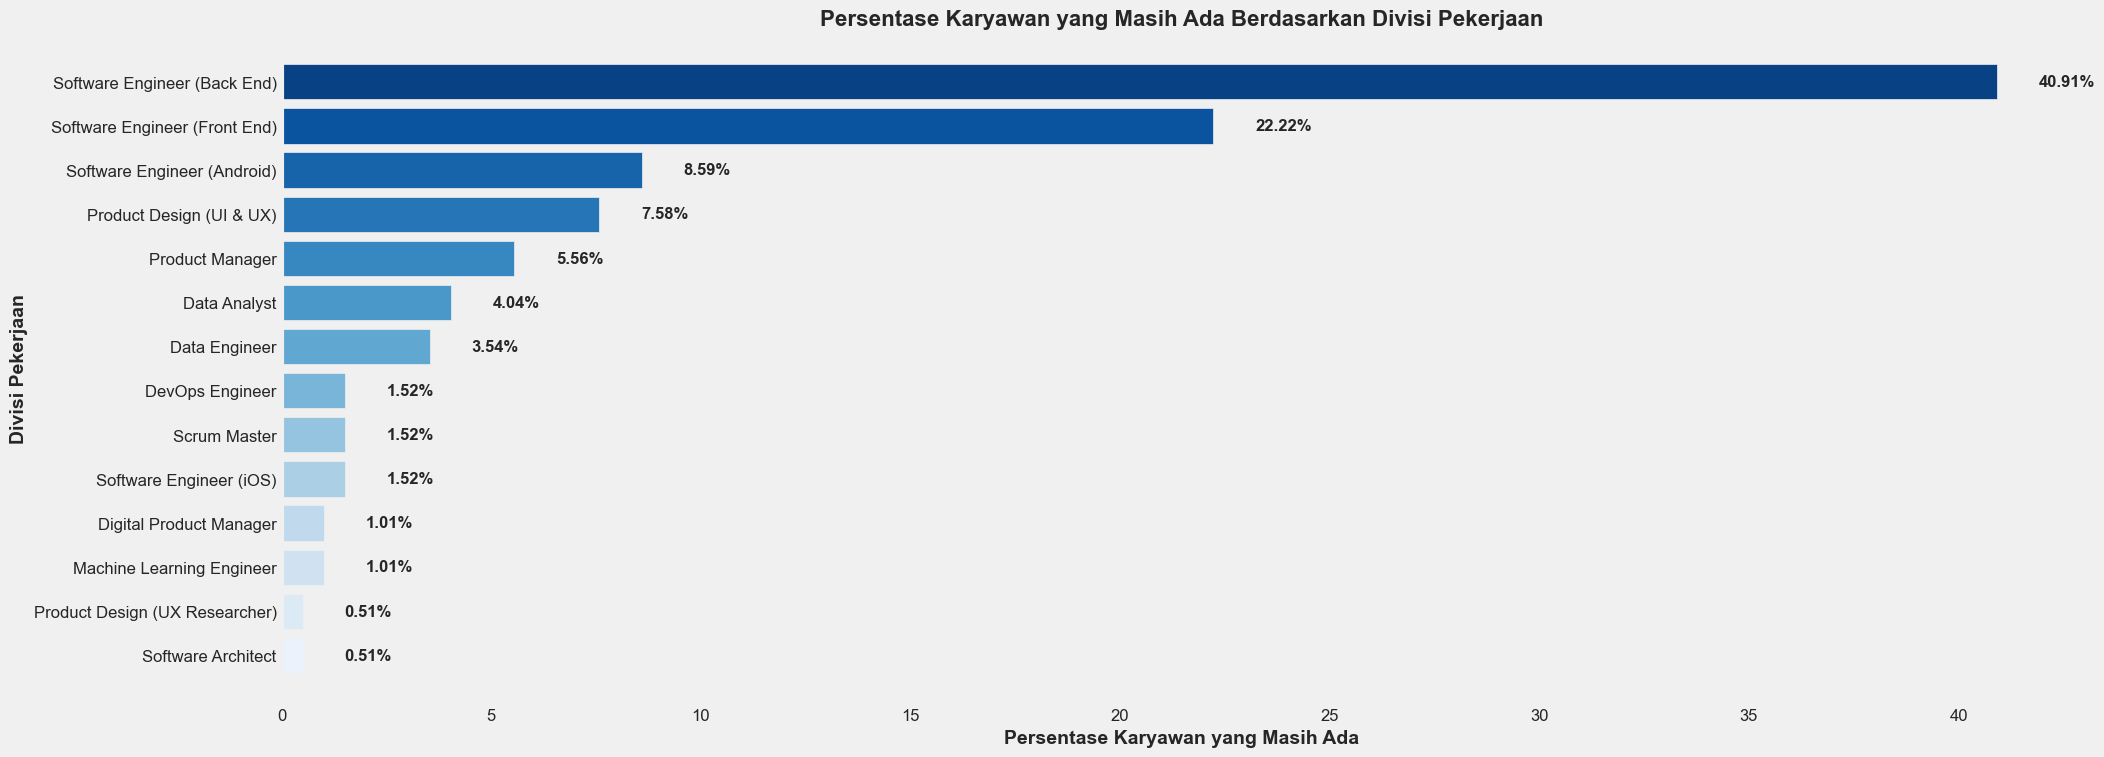

In [67]:
divisions = [
    'Product Design (UX Researcher)',
    'Software Architect',
    'Digital Product Manager',
    'Machine Learning Engineer',
    'DevOps Engineer',
    'Scrum Master',
    'Software Engineer (iOS)',
    'Data Engineer',
    'Data Analyst', 
    'Product Manager',
    'Product Design (UI & UX)',
    'Software Engineer (Android)',
    'Software Engineer (Front End)',
    'Software Engineer (Back End)'
]

counts = [
    1, 1, 2, 2, 3, 3, 3, 7, 8, 11, 15, 17, 44, 81
]

total_karyawan = sum(counts)
percentages = [(count / total_karyawan) * 100 for count in counts]

# Sort divisions and percentages in ascending order by values
sorted_data = sorted(zip(divisions, percentages), key=lambda x: x[1], reverse=True)

divisions, percentages = zip(*sorted_data)

# Customize the color palette (bluer shades, from light to dark, reversed for correct gradation)
colors = sns.color_palette('Blues', len(divisions))[::-1]

# Create the horizontal bar chart
plt.barh(divisions, percentages, color=colors)
plt.xlabel('Persentase Karyawan yang Masih Ada', fontsize=14, fontweight='bold')
plt.ylabel('Divisi Pekerjaan', fontsize=14, fontweight='bold')
plt.title('Persentase Karyawan yang Masih Ada Berdasarkan Divisi Pekerjaan', fontsize=16, fontweight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.gca().invert_yaxis()  # Reverse the order of divisions

# Remove the grid
plt.grid(False)

# Add labels to the bars
for i, percentage in enumerate(percentages):
    plt.text(percentage + 1, i, f'{percentage:.2f}%', va='center', fontsize=12, fontweight='bold')

plt.show()

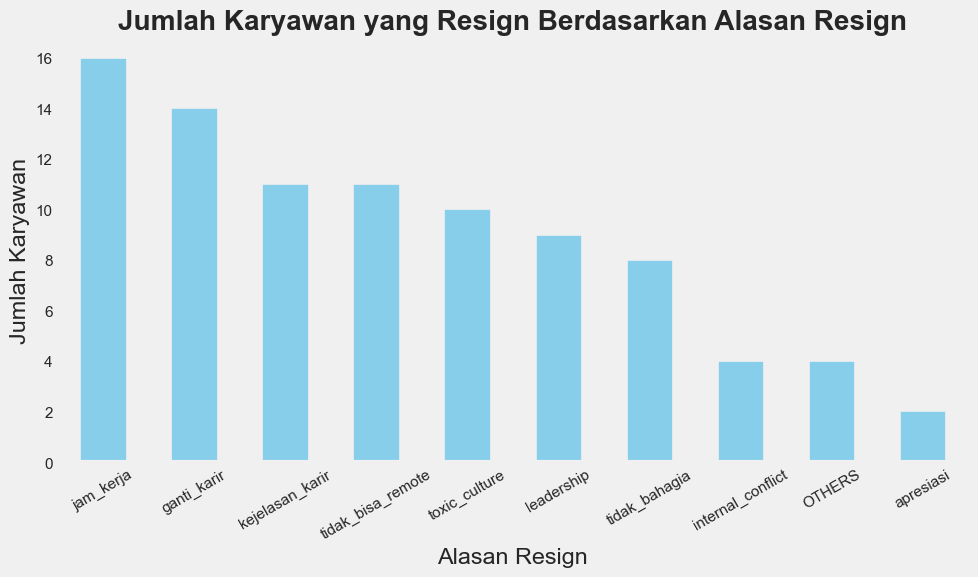

In [68]:
# Mengonversi kolom tanggal menjadi tipe datetime
df['TanggalResign'] = pd.to_datetime(df['TanggalResign'], errors='coerce')  # Mengubah NaN menjadi Tanggal

# Menghitung jumlah karyawan yang resign berdasarkan alasan
jumlah_resign_per_alasan = df[df['TanggalResign'].notnull()]['AlasanResign'].value_counts()

# Membuat grafik batang
plt.figure(figsize=(10, 6))
jumlah_resign_per_alasan.plot(kind='bar', color='skyblue')
plt.title('Jumlah Karyawan yang Resign Berdasarkan Alasan Resign', fontweight='bold')
plt.xlabel('Alasan Resign')
plt.ylabel('Jumlah Karyawan')
plt.xticks(rotation=30)
# Menghilangkan garis pada grafik
plt.grid(False)

# Menampilkan grafik
plt.tight_layout()
plt.show()

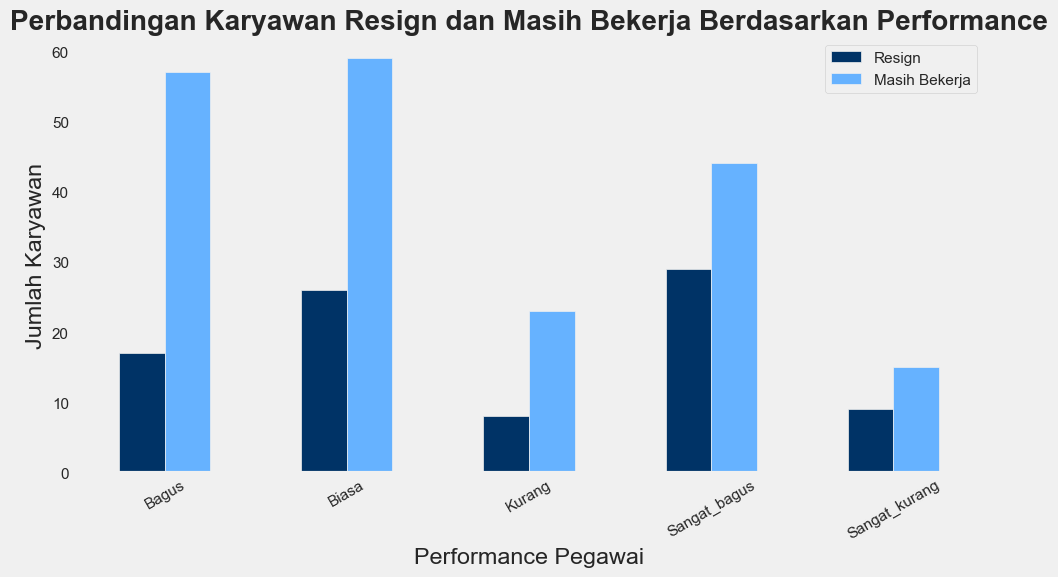

In [69]:
# Mengonversi kolom tanggal menjadi tipe datetime
df['TanggalResign'] = pd.to_datetime(df['TanggalResign'], errors='coerce')  # Mengubah NaN menjadi Tanggal

# Menghitung jumlah karyawan yang resign berdasarkan PerformancePegawai
jumlah_resign_performance = df[df['TanggalResign'].notnull()]['PerformancePegawai'].value_counts()

# Menghitung jumlah karyawan yang masih bekerja berdasarkan PerformancePegawai
jumlah_masih_bekerja_performance = df[df['TanggalResign'].isnull()]['PerformancePegawai'].value_counts()

# Menggabungkan kedua hasil
jumlah_performance = pd.DataFrame({
    'Resign': jumlah_resign_performance,
    'Masih Bekerja': jumlah_masih_bekerja_performance
}).fillna(0)

# Membuat grafik perbandingan
jumlah_performance.plot(kind='bar', figsize=(10, 6), color=['#003366', '#66B2FF'])  # Biru gelap dan biru terang
plt.title('Perbandingan Karyawan Resign dan Masih Bekerja Berdasarkan Performance', fontweight='bold')
plt.xlabel('Performance Pegawai')
plt.ylabel('Jumlah Karyawan')
plt.xticks(rotation=30)
plt.grid(False)

# Menampilkan grafik
plt.tight_layout()
plt.show()

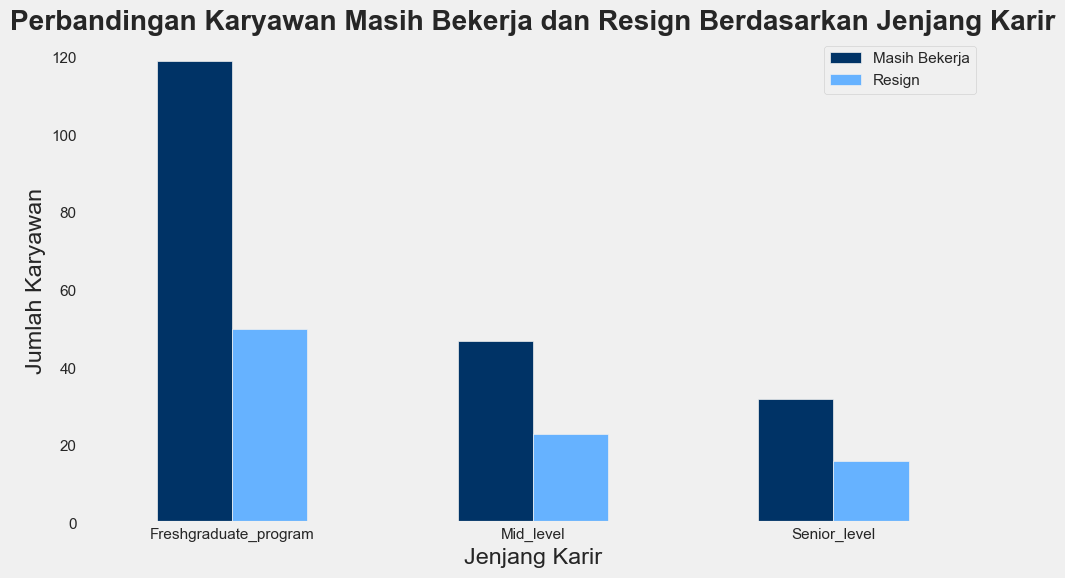

In [70]:
# Mengonversi kolom tanggal menjadi tipe datetime
df['TanggalResign'] = pd.to_datetime(df['TanggalResign'], errors='coerce')  # Mengubah NaN menjadi Tanggal

# Menghitung jumlah karyawan yang resign berdasarkan JenjangKarir
jumlah_resign_jenjang = df[df['TanggalResign'].notnull()]['JenjangKarir'].value_counts()

# Menghitung jumlah karyawan yang masih bekerja berdasarkan JenjangKarir
jumlah_masih_bekerja_jenjang = df[df['TanggalResign'].isnull()]['JenjangKarir'].value_counts()

# Menggabungkan kedua hasil
jumlah_perbandingan = pd.DataFrame({
    'Masih Bekerja': jumlah_masih_bekerja_jenjang,
    'Resign': jumlah_resign_jenjang
}).fillna(0)

# Membuat grafik perbandingan
jumlah_perbandingan.plot(kind='bar', figsize=(10, 6), color=['#003366', '#66B2FF'])  # Biru gelap dan biru terang
plt.title('Perbandingan Karyawan Masih Bekerja dan Resign Berdasarkan Jenjang Karir', fontweight='bold')
plt.xlabel('Jenjang Karir')
plt.ylabel('Jumlah Karyawan')
plt.xticks(rotation=0)
plt.grid(False)

# Menampilkan grafik
plt.tight_layout()
plt.show()

                                Resign  Masih Bekerja
Pekerjaan                                            
Software Engineer (Back End)      28.0             81
Software Engineer (Front End)     28.0             44
Product Design (UI & UX)           9.0             15
Data Analyst                       8.0              8
Software Engineer (Android)        7.0             17
Product Manager                    6.0             11
Data Engineer                      3.0              7
DevOps Engineer                    0.0              3
Digital Product Manager            0.0              2
Machine Learning Engineer          0.0              2
Product Design (UX Researcher)     0.0              1
Scrum Master                       0.0              3
Software Architect                 0.0              1
Software Engineer (iOS)            0.0              3
Pekerjaan dengan jumlah resign terbanyak: Software Engineer (Back End) dengan 28.0 karyawan resign


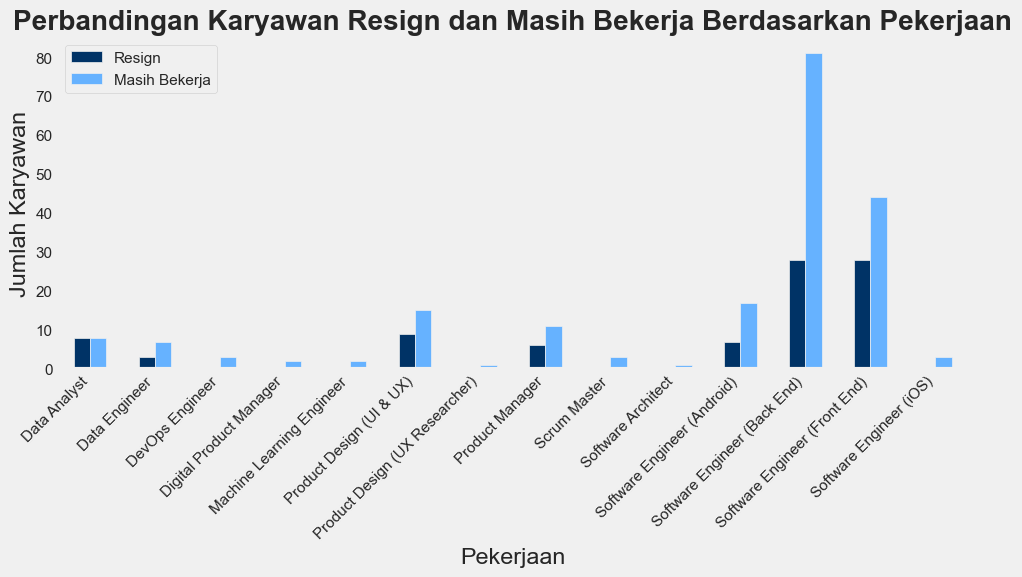

In [71]:
# Memastikan 'TanggalResign' sudah dikonversi ke datetime
df['TanggalResign'] = pd.to_datetime(df['TanggalResign'], errors='coerce')

# Menghitung jumlah karyawan yang resign berdasarkan 'Pekerjaan'
jumlah_resign_pekerjaan = df[df['TanggalResign'].notnull()]['Pekerjaan'].value_counts()

# Menghitung jumlah karyawan yang masih bekerja berdasarkan 'Pekerjaan'
jumlah_masih_bekerja_pekerjaan = df[df['TanggalResign'].isnull()]['Pekerjaan'].value_counts()

# Menggabungkan kedua hasil
jumlah_pekerjaan = pd.DataFrame({
    'Resign': jumlah_resign_pekerjaan,
    'Masih Bekerja': jumlah_masih_bekerja_pekerjaan
}).fillna(0)

# Menampilkan pekerjaan dengan jumlah resign terbanyak
jumlah_pekerjaan_sorted = jumlah_pekerjaan.sort_values(by='Resign', ascending=False)

# Menampilkan hasil
print(jumlah_pekerjaan_sorted)

# Menampilkan pekerjaan dengan jumlah resign terbanyak
pekerjaan_terbanyak_resign = jumlah_pekerjaan_sorted.iloc[0]
print(f"Pekerjaan dengan jumlah resign terbanyak: {pekerjaan_terbanyak_resign.name} dengan {pekerjaan_terbanyak_resign['Resign']} karyawan resign")

# Membuat grafik perbandingan
jumlah_pekerjaan.plot(kind='bar', figsize=(10, 6), color=['#003366', '#66B2FF'])  # Biru gelap dan biru terang
plt.title('Perbandingan Karyawan Resign dan Masih Bekerja Berdasarkan Pekerjaan', fontweight='bold')
plt.xlabel('Pekerjaan')
plt.ylabel('Jumlah Karyawan')
plt.xticks(rotation=45, ha='right')
plt.grid(False)

# Menampilkan grafik
plt.tight_layout()
plt.show()

                                Resign  Masih Bekerja  Total  Persentase Resign
Pekerjaan                                                                      
Software Engineer (Back End)      28.0             81  109.0          25.688073
Software Engineer (Front End)     28.0             44   72.0          38.888889
Product Design (UI & UX)           9.0             15   24.0          37.500000
Data Analyst                       8.0              8   16.0          50.000000
Software Engineer (Android)        7.0             17   24.0          29.166667
Product Manager                    6.0             11   17.0          35.294118
Data Engineer                      3.0              7   10.0          30.000000
DevOps Engineer                    0.0              3    3.0           0.000000
Digital Product Manager            0.0              2    2.0           0.000000
Machine Learning Engineer          0.0              2    2.0           0.000000
Product Design (UX Researcher)     0.0  

<Figure size 1000x600 with 0 Axes>

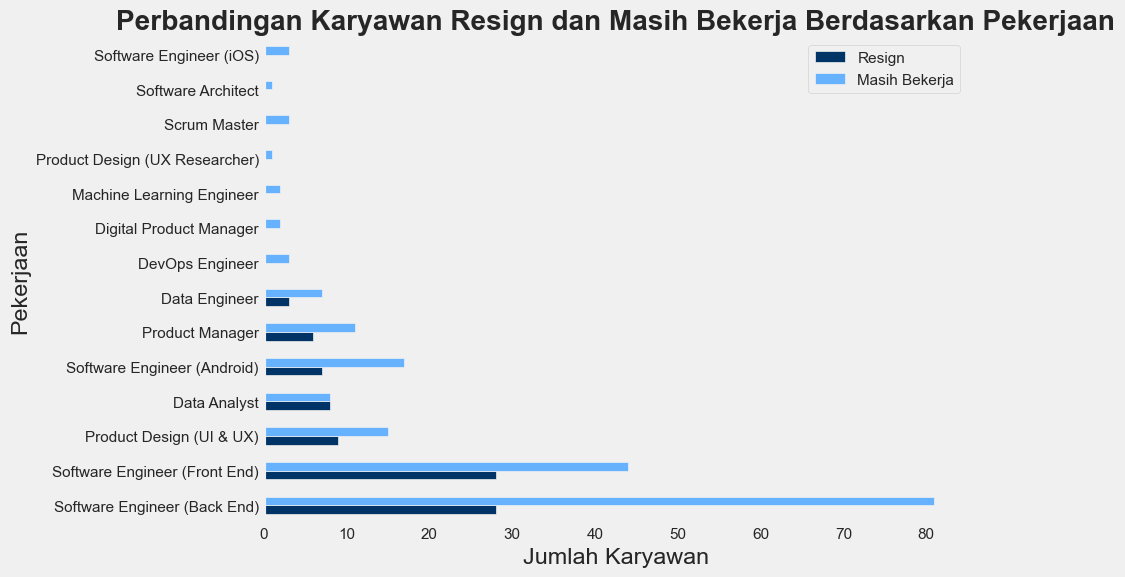

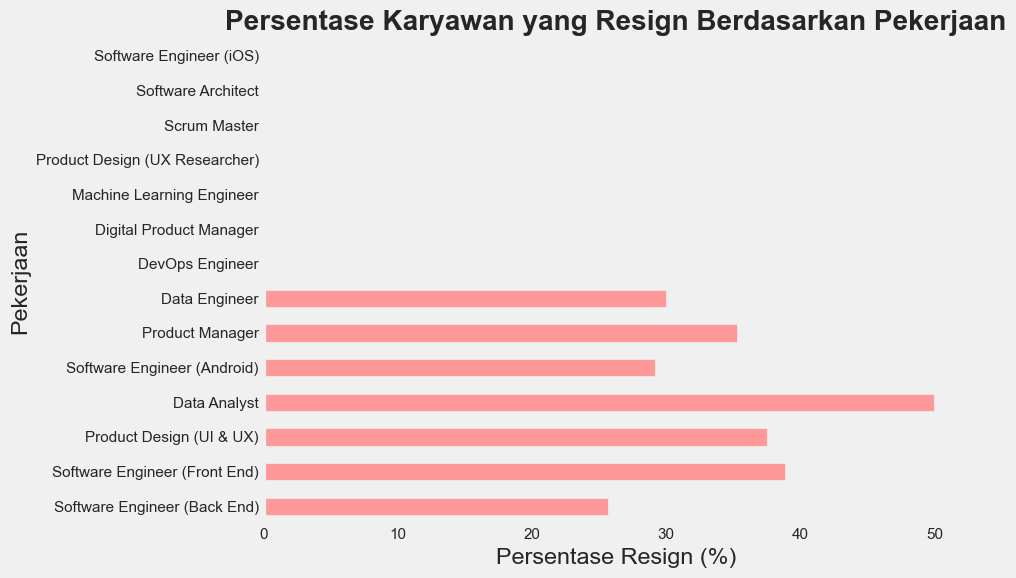

In [72]:
# Memastikan 'TanggalResign' sudah dikonversi ke datetime
df['TanggalResign'] = pd.to_datetime(df['TanggalResign'], errors='coerce')

# Menghitung jumlah karyawan yang resign berdasarkan 'Pekerjaan'
jumlah_resign_pekerjaan = df[df['TanggalResign'].notnull()]['Pekerjaan'].value_counts()

# Menghitung jumlah karyawan yang masih bekerja berdasarkan 'Pekerjaan'
jumlah_masih_bekerja_pekerjaan = df[df['TanggalResign'].isnull()]['Pekerjaan'].value_counts()

# Menggabungkan kedua hasil
jumlah_pekerjaan = pd.DataFrame({
    'Resign': jumlah_resign_pekerjaan,
    'Masih Bekerja': jumlah_masih_bekerja_pekerjaan
}).fillna(0)

# Menghitung total karyawan per pekerjaan dan persentase resign
jumlah_pekerjaan['Total'] = jumlah_pekerjaan['Resign'] + jumlah_pekerjaan['Masih Bekerja']
jumlah_pekerjaan['Persentase Resign'] = (jumlah_pekerjaan['Resign'] / jumlah_pekerjaan['Total']) * 100

# Menampilkan pekerjaan dengan jumlah resign terbanyak
jumlah_pekerjaan_sorted = jumlah_pekerjaan.sort_values(by='Resign', ascending=False)

# Menampilkan hasil
print(jumlah_pekerjaan_sorted)

# Menampilkan pekerjaan dengan jumlah resign terbanyak
pekerjaan_terbanyak_resign = jumlah_pekerjaan_sorted.iloc[0]
print(f"Pekerjaan dengan jumlah resign terbanyak: {pekerjaan_terbanyak_resign.name} dengan {pekerjaan_terbanyak_resign['Resign']} karyawan resign ({pekerjaan_terbanyak_resign['Persentase Resign']:.2f}% resign)")

# Membuat grafik perbandingan secara horizontal
plt.figure(figsize=(10, 6))
jumlah_pekerjaan_sorted[['Resign', 'Masih Bekerja']].plot(kind='barh', stacked=False, figsize=(10, 6), color=['#003366', '#66B2FF'])
plt.title('Perbandingan Karyawan Resign dan Masih Bekerja Berdasarkan Pekerjaan', fontweight='bold')
plt.xlabel('Jumlah Karyawan')
plt.ylabel('Pekerjaan')
plt.grid(False)

# Menampilkan grafik
plt.tight_layout()
plt.show()

# Membuat grafik persentase resign
plt.figure(figsize=(10, 6))
jumlah_pekerjaan_sorted['Persentase Resign'].plot(kind='barh', color='#FF9999', figsize=(10, 6))
plt.title('Persentase Karyawan yang Resign Berdasarkan Pekerjaan', fontweight='bold')
plt.xlabel('Persentase Resign (%)')
plt.ylabel('Pekerjaan')
plt.grid(False)

# Menampilkan grafik
plt.tight_layout()
plt.show()

### Feature Encoding

In [74]:

# Deteksi missing value pada baris dan kolom
missing_rows = df.isnull().sum(axis=1)
missing_columns = df.isnull().sum(axis=0)

print('Total baris kosong:', missing_rows)
print('Total kolom kosong:', missing_columns)
     

Total baris kosong: 0      5
1      0
2      0
3      5
4      0
      ..
282    5
283    0
284    0
285    0
286    5
Length: 287, dtype: int64
Total kolom kosong: Username                                0
EnterpriseID                            0
StatusPernikahan                        0
JenisKelamin                            0
StatusKepegawaian                       0
Pekerjaan                               0
JenjangKarir                            0
PerformancePegawai                      0
AsalDaerah                              0
HiringPlatform                          0
SkorSurveyEngagement                    0
SkorKepuasanPegawai                     0
JumlahKeikutsertaanProjek               0
JumlahKeterlambatanSebulanTerakhir      0
JumlahKetidakhadiran                    0
TingkatPendidikan                       0
PernahBekerja                           0
AlasanResign                            0
TanggalLahir                            0
TanggalHiring                        

In [75]:

# Deteksi data duplikat
duplicate_rows = df.duplicated()

print("total kemunculan duplikasi data:", duplicate_rows)

total kemunculan duplikasi data: 0      False
1      False
2      False
3      False
4      False
       ...  
282    False
283    False
284    False
285    False
286    False
Length: 287, dtype: bool


#### Encoding df

In [77]:
# dataframe di copy untuk encoding 
# dataframe yang di encoding = df_new
df_new = df.copy()

In [78]:
df.head(3)

,Username,EnterpriseID,StatusPernikahan,JenisKelamin,StatusKepegawaian,Pekerjaan,JenjangKarir,PerformancePegawai,AsalDaerah,HiringPlatform,SkorSurveyEngagement,SkorKepuasanPegawai,JumlahKeikutsertaanProjek,JumlahKeterlambatanSebulanTerakhir,JumlahKetidakhadiran,TingkatPendidikan,PernahBekerja,AlasanResign,TanggalLahir,TanggalHiring,TanggalPenilaianKaryawan,TanggalResign,StatusKerja,Tanggal_Hiring,Bulan_Hiring,Tahun_Hiring,Tanggal_Resign,Bulan_Resign,Tahun_Resign,Umur,DurasiJabatan,LamaBekerja,Rata-rata Skor Kinerja Total,JumlahKetidakhadiranPerTahun,TahunHiring,TahunResign
0,spiritedPorpoise3,111065,Belum_menikah,Pria,Outsource,Software Engineer (Back End),Freshgraduate_program,Sangat_bagus,Jakarta Timur,Employee_Referral,4,4.0,0.0,0.0,9.0,Magister,1,masih_bekerja,1972-07-01,2011-01-10,2016-02-15,NaT,1,10,1,2011,NaN,NaN,<NA>,52,5.0,13,4.0,1.8,2011,NaN
1,jealousGelding2,106080,Belum_menikah,Pria,FullTime,Data Analyst,Freshgraduate_program,Sangat_kurang,Jakarta Utara,Website,4,4.0,4.0,0.0,3.0,Sarjana,1,toxic_culture,1984-04-26,2014-01-06,2020-01-17,2018-06-16,0,6,1,2014,16.0,6.0,2018,40,6.0,4,4.0,0.5,2014,2018.0
2,pluckyMuesli3,106452,Menikah,Pria,FullTime,Software Engineer (Front End),Freshgraduate_program,Bagus,Jakarta Timur,Indeed,4,3.0,0.0,0.0,11.0,Magister,1,jam_kerja,1974-01-07,2011-01-10,2016-01-10,2014-09-24,0,10,1,2011,24.0,9.0,2014,50,5.0,3,3.5,2.2,2011,2014.0


In [79]:
# Daftar kolom yang akan di-one hot encode
one_hot = ['StatusPernikahan', 'StatusKepegawaian', 'HiringPlatform', 'AsalDaerah']

# Kolom yang akan di-label encode
label_encode = ['JenisKelamin', 'PerformancePegawai', 'TingkatPendidikan', 'PernahBekerja', 'Pekerjaan', 'AlasanResign', 'JenjangKarir']

# Memastikan hanya kolom yang ada di df_new yang digunakan
one_hot = [col for col in one_hot if col in df_new.columns]

# Melakukan one-hot encoding
df_new = pd.get_dummies(df_new, columns=one_hot)

# Melakukan label encoding untuk PerformancePegawai
performance_mapping = {
    'Sangat_kurang': 1,
    'Kurang': 2,
    'Biasa': 3,
    'Bagus': 4,
    'Sangat_bagus': 5
}
df_new['PerformancePegawai'] = df_new['PerformancePegawai'].map(performance_mapping)


jenjang_mapping = {
    'Freshgraduate_program': 1,
    'Mid_level': 2,
    'Senior_level': 3
}
df_new['JenjangKarir'] = df_new['JenjangKarir'].map(jenjang_mapping)

# Melakukan label encoding untuk jenis kelamin
label_encoder = LabelEncoder()
df_new['JenisKelamin'] = label_encoder.fit_transform(df_new['JenisKelamin'])

# Label encoding untuk TingkatPendidikan
df_new['TingkatPendidikan'] = label_encoder.fit_transform(df_new['TingkatPendidikan'])

# Label encoding untuk AlasanResign
df_new['AlasanResign'] = label_encoder.fit_transform(df_new['AlasanResign'])

# Label encoding untuk AlasanResign
df_new['Pekerjaan'] = label_encoder.fit_transform(df_new['Pekerjaan'])

# Mengganti nilai boolean menjadi 0 dan 1
df_new.replace({True: 1, False: 0}, inplace=True)

In [80]:
# removing unecesssary columns
columns_to_drop = ['Username', 'EnterpriseID', 'TanggalLahir', 'TanggalHiring', 'TanggalPenilaianKaryawan', 'TanggalResign', 'TahunResign', 'Tahun_Resign', 'Tanggal_Resign', 'Bulan_Resign']
df_new.drop(columns_to_drop, axis=1, inplace=True)

### Feature Selection

In [118]:
df_new.head()

,JenisKelamin,Pekerjaan,JenjangKarir,PerformancePegawai,SkorSurveyEngagement,SkorKepuasanPegawai,JumlahKeikutsertaanProjek,JumlahKeterlambatanSebulanTerakhir,JumlahKetidakhadiran,TingkatPendidikan,PernahBekerja,AlasanResign,StatusKerja,Tanggal_Hiring,Bulan_Hiring,Tahun_Hiring,Umur,DurasiJabatan,LamaBekerja,Rata-rata Skor Kinerja Total,JumlahKetidakhadiranPerTahun,TahunHiring,StatusPernikahan_Belum_menikah,StatusPernikahan_Bercerai,StatusPernikahan_Lainnya,StatusPernikahan_Menikah,StatusKepegawaian_FullTime,StatusKepegawaian_Internship,StatusKepegawaian_Outsource,HiringPlatform_CareerBuilder,HiringPlatform_Diversity_Job_Fair,HiringPlatform_Employee_Referral,HiringPlatform_Google_Search,HiringPlatform_Indeed,HiringPlatform_LinkedIn,HiringPlatform_On-line_Web_application,HiringPlatform_Other,HiringPlatform_Website,AsalDaerah_Jakarta Barat,AsalDaerah_Jakarta Pusat,AsalDaerah_Jakarta Selatan,AsalDaerah_Jakarta Timur,AsalDaerah_Jakarta Utara
0,0,11,1,5,4,4.0,0.0,0.0,9.0,1,1,7,1,10,1,2011,52,5.0,13,4.0,1.800000,2011,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0
1,0,0,1,1,4,4.0,4.0,0.0,3.0,2,1,10,0,6,1,2014,40,6.0,4,4.0,0.500000,2014,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2,0,12,1,4,4,3.0,0.0,0.0,11.0,1,1,4,0,10,1,2011,50,5.0,3,3.5,2.200000,2011,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
3,0,12,1,4,3,3.0,0.0,4.0,6.0,2,1,7,1,17,2,2014,45,6.0,10,3.0,1.000000,2014,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0
4,1,7,1,4,3,3.0,0.0,0.0,11.0,2,1,2,0,11,11,2013,50,6.0,4,3.0,1.833333,2013,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0


In [120]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287 entries, 0 to 286
Data columns (total 43 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   JenisKelamin                            287 non-null    int32  
 1   Pekerjaan                               287 non-null    int32  
 2   JenjangKarir                            287 non-null    int64  
 3   PerformancePegawai                      287 non-null    int64  
 4   SkorSurveyEngagement                    287 non-null    int64  
 5   SkorKepuasanPegawai                     287 non-null    float64
 6   JumlahKeikutsertaanProjek               287 non-null    float64
 7   JumlahKeterlambatanSebulanTerakhir      287 non-null    float64
 8   JumlahKetidakhadiran                    287 non-null    float64
 9   TingkatPendidikan                       287 non-null    int32  
 10  PernahBekerja                           287 non-null    object

In [122]:
num = ['JumlahKeikutsertaanProjek', 'JumlahKeterlambatanSebulanTerakhir', 'JumlahKetidakhadiran', 'SkorKepuasanPegawai', 'SkorSurveyEngagement', 'Umur', 'DurasiJabatan', 'LamaBekerja', 'StatusKerja']
#cat = ['Username', 'StatusPernikahan', 'JenisKelamin', 'StatusKepegawaian', 'Pekerjaan', 'JenjangKarir', 'PerformancePegawai', 'AsalDaerah', 'HiringPlatform', 'NomorHP', 'Email', 'TingkatPendidikan', 'PernahBekerja', 'IkutProgramLOP', 'AlasanResign']
#time = ['TanggalLahir',	'TanggalHiring', 'TanggalPenilaianKaryawan','TanggalResign']

In [124]:
df_new.head(2)

,JenisKelamin,Pekerjaan,JenjangKarir,PerformancePegawai,SkorSurveyEngagement,SkorKepuasanPegawai,JumlahKeikutsertaanProjek,JumlahKeterlambatanSebulanTerakhir,JumlahKetidakhadiran,TingkatPendidikan,PernahBekerja,AlasanResign,StatusKerja,Tanggal_Hiring,Bulan_Hiring,Tahun_Hiring,Umur,DurasiJabatan,LamaBekerja,Rata-rata Skor Kinerja Total,JumlahKetidakhadiranPerTahun,TahunHiring,StatusPernikahan_Belum_menikah,StatusPernikahan_Bercerai,StatusPernikahan_Lainnya,StatusPernikahan_Menikah,StatusKepegawaian_FullTime,StatusKepegawaian_Internship,StatusKepegawaian_Outsource,HiringPlatform_CareerBuilder,HiringPlatform_Diversity_Job_Fair,HiringPlatform_Employee_Referral,HiringPlatform_Google_Search,HiringPlatform_Indeed,HiringPlatform_LinkedIn,HiringPlatform_On-line_Web_application,HiringPlatform_Other,HiringPlatform_Website,AsalDaerah_Jakarta Barat,AsalDaerah_Jakarta Pusat,AsalDaerah_Jakarta Selatan,AsalDaerah_Jakarta Timur,AsalDaerah_Jakarta Utara
0,0,11,1,5,4,4.0,0.0,0.0,9.0,1,1,7,1,10,1,2011,52,5.0,13,4.0,1.8,2011,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0
1,0,0,1,1,4,4.0,4.0,0.0,3.0,2,1,10,0,6,1,2014,40,6.0,4,4.0,0.5,2014,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1


<Axes: >

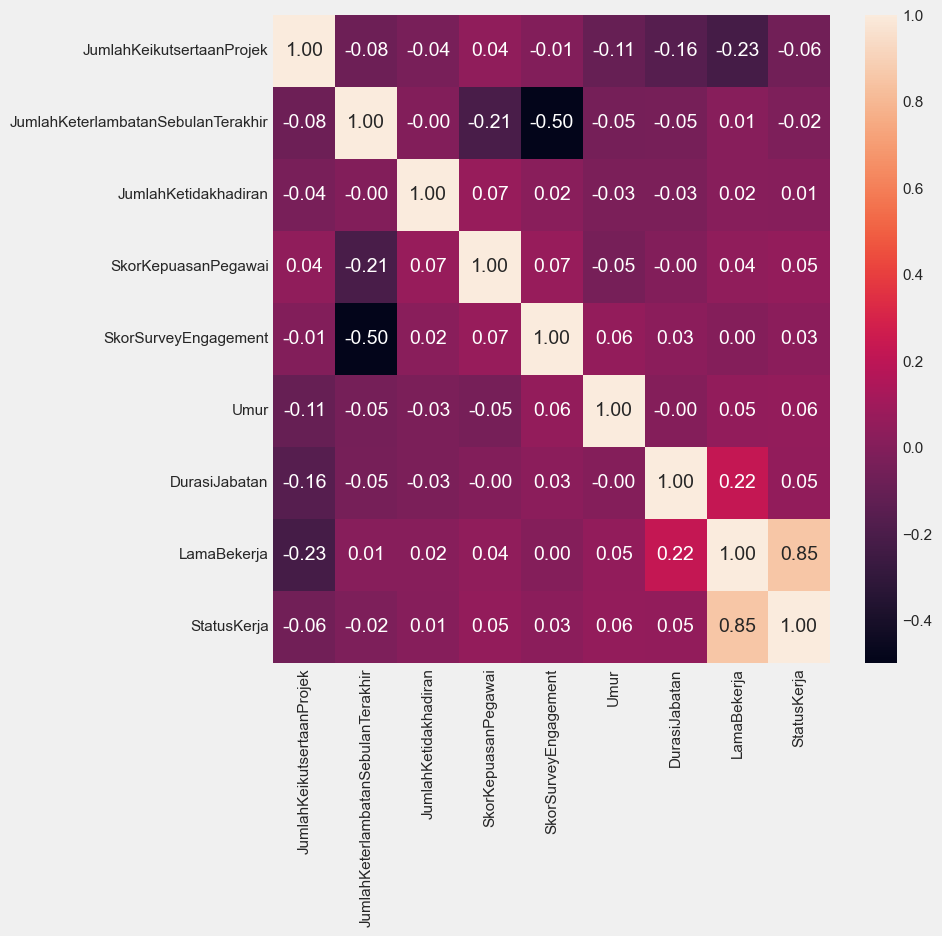

In [126]:
# analisi menggunakan heatmap
plt.figure(figsize=(8,8))
sns.heatmap(df_new[num].corr(), annot=True, fmt='.2f')

In [128]:
from sklearn.feature_selection import chi2
from sklearn.preprocessing import LabelEncoder


# Assuming df is your dataset containing the required columns
X = df_new[['JenisKelamin', 'PerformancePegawai', 'TingkatPendidikan', 'PernahBekerja', 'StatusPernikahan_Belum_menikah',	'StatusPernikahan_Bercerai', 'StatusPernikahan_Lainnya', 'StatusPernikahan_Menikah', 'StatusKepegawaian_FullTime',	'StatusKepegawaian_Internship',	'StatusKepegawaian_Outsource', 
           'JenjangKarir', 'HiringPlatform_CareerBuilder',	'HiringPlatform_Diversity_Job_Fair', 'HiringPlatform_Employee_Referral', 'HiringPlatform_Google_Search', 'HiringPlatform_Indeed', 'JumlahKetidakhadiranPerTahun', 
            'HiringPlatform_LinkedIn', 'HiringPlatform_On-line_Web_application', 'HiringPlatform_Other', 'HiringPlatform_Website', 'AsalDaerah_Jakarta Barat',	'AsalDaerah_Jakarta Pusat', 'AsalDaerah_Jakarta Selatan', 'AsalDaerah_Jakarta Timur', 'AsalDaerah_Jakarta Utara', 'Pekerjaan']]
y = df_new['StatusKerja']

# Compute chi2 statistics
chi2_stats, p_values = chi2(X, y)

# Display results
results = pd.DataFrame({
    'Feature': X.columns,
    'Chi2 Statistic': chi2_stats,
    'P-value': p_values
})

results_sorted = results.sort_values(by='Chi2 Statistic', ascending=False)

# Display sorted results
print("Sorted Chi-squared statistics for feature selection:", X.columns)
print(results_sorted)

Sorted Chi-squared statistics for feature selection: Index(['JenisKelamin', 'PerformancePegawai', 'TingkatPendidikan',
       'PernahBekerja', 'StatusPernikahan_Belum_menikah',
       'StatusPernikahan_Bercerai', 'StatusPernikahan_Lainnya',
       'StatusPernikahan_Menikah', 'StatusKepegawaian_FullTime',
       'StatusKepegawaian_Internship', 'StatusKepegawaian_Outsource',
       'JenjangKarir', 'HiringPlatform_CareerBuilder',
       'HiringPlatform_Diversity_Job_Fair', 'HiringPlatform_Employee_Referral',
       'HiringPlatform_Google_Search', 'HiringPlatform_Indeed',
       'JumlahKetidakhadiranPerTahun', 'HiringPlatform_LinkedIn',
       'HiringPlatform_On-line_Web_application', 'HiringPlatform_Other',
       'HiringPlatform_Website', 'AsalDaerah_Jakarta Barat',
       'AsalDaerah_Jakarta Pusat', 'AsalDaerah_Jakarta Selatan',
       'AsalDaerah_Jakarta Timur', 'AsalDaerah_Jakarta Utara', 'Pekerjaan'],
      dtype='object')
                                   Feature  Chi2 Statistic   

In [130]:
import pandas as pd
from sklearn.feature_selection import f_classif

# Assuming df is your DataFrame containing the columns mentioned
X_columns = ['JumlahKeikutsertaanProjek', 'JumlahKeterlambatanSebulanTerakhir', 'JumlahKetidakhadiran', 'SkorKepuasanPegawai', 'SkorSurveyEngagement', 'Umur', 'DurasiJabatan',	'LamaBekerja', 
            'TahunHiring', 'Bulan_Hiring']

X = df_new[X_columns]
y = df_new['StatusKerja']

# Compute ANOVA F-value and p-values
f_scores, p_values = f_classif(X, y)

# Create a DataFrame to display results
results = pd.DataFrame({'Feature': X_columns, 'F-Score': f_scores, 'P-Value': p_values})

# Sort the results by F-score in descending order
results_sorted_by_fscore = results.sort_values(by='F-Score', ascending=False)

# Print the sorted table
print(results_sorted_by_fscore)

                              Feature     F-Score       P-Value
7                         LamaBekerja  738.727894  4.059765e-81
0           JumlahKeikutsertaanProjek    1.139752  2.866083e-01
5                                Umur    0.932173  3.351174e-01
3                 SkorKepuasanPegawai    0.858448  3.549574e-01
6                       DurasiJabatan    0.629592  4.281650e-01
4                SkorSurveyEngagement    0.207984  6.486996e-01
9                        Bulan_Hiring    0.186289  6.663499e-01
1  JumlahKeterlambatanSebulanTerakhir    0.107804  7.428998e-01
8                         TahunHiring    0.028949  8.650166e-01
2                JumlahKetidakhadiran    0.008737  9.255964e-01


### Class Imbalance

In [135]:
df_new['StatusKerja'].value_counts()

StatusKerja
1    198
0     89
Name: count, dtype: int64

In [137]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler, SMOTE

In [139]:
X = df_new[[col for col in df_new.columns if (str(df_new[col].dtype) != 'object') and col not in ['StatusKerja']]]
y = df_new['StatusKerja'].values
print(X.shape)

(287, 41)


In [141]:
X_under, y_under = RandomUnderSampler(sampling_strategy=0.5).fit_resample(X, y)

X_over, y_over = RandomOverSampler(sampling_strategy=0.5).fit_resample(X, y)

X_over_SMOTE, y_over_SMOTE = SMOTE(sampling_strategy=0.5).fit_resample(X, y)

In [143]:
print('Original')
print(pd.Series(y).value_counts())
print('\n')
print('UNDERSAMPLING')
print(pd.Series(y_under).value_counts())
print('\n')
print('OVERSAMPLING')
print(pd.Series(y_over).value_counts())
print('\n')
print('SMOTE')
print(pd.Series(y_over_SMOTE).value_counts())

Original
1    198
0     89
Name: count, dtype: int64


UNDERSAMPLING
1    178
0     89
Name: count, dtype: int64


OVERSAMPLING
1    198
0     99
Name: count, dtype: int64


SMOTE
1    198
0     99
Name: count, dtype: int64


In [298]:
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE


# Assign features dan target variable
X = df_new[[ 'LamaBekerja', 'DurasiJabatan', 'JenjangKarir', 'Pekerjaan', 'TingkatPendidikan', 
           'Umur', 'SkorKepuasanPegawai', 'JumlahKeikutsertaanProjek', 'StatusKepegawaian_Internship', 'HiringPlatform_Diversity_Job_Fair']]
y = df_new['StatusKerja']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Initialize SMOTE
smote = SMOTE(random_state=42, sampling_strategy=0.5)

# Apply SMOTE to the training data
X_train, y_train = smote.fit_resample(X_train, y_train)

print('SMOTE')
print(pd.Series(y_train).value_counts())

SMOTE
StatusKerja
1    138
0     69
Name: count, dtype: int64


In [281]:
# Scaling data with robust scaler
from sklearn.preprocessing import StandardScaler

# Inisialisasi StandardScaler
scaler = StandardScaler()

# Fit dan transform data training
X_train_scaled = scaler.fit_transform(X_train)

# Transform data testing (gunakan transform saja, bukan fit_transform)
X_test_scaled = scaler.transform(X_test)

In [283]:
# Scale X for cross evaluation
X_scaled = scaler.fit_transform(X)

### Modelling

In [286]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.model_selection import cross_validate, cross_val_predict

def eval_classification(model):
    # Fit the model
    model.fit(X_train_scaled, y_train)

    y_pred = model.predict(X_test_scaled)
    y_pred_train = model.predict(X_train_scaled)
    y_pred_proba = model.predict_proba(X_test_scaled)
    y_pred_proba_train = model.predict_proba(X_train_scaled)

    print("Accuracy (Test Set): %.2f" % accuracy_score(y_test, y_pred))
    print("Accuracy (Train Set): %.2f" % accuracy_score(y_train, y_pred_train))
    print("Precision (Test Set): %.2f" % precision_score(y_test, y_pred))
    print("Precision (Train Set): %.2f" % precision_score(y_train, y_pred_train))
    print("Recall (Test Set): %.2f" % recall_score(y_test, y_pred))
    print("Recall (Train Set): %.2f" % recall_score(y_train, y_pred_train))
    print("F1-Score (Test Set): %.2f" % f1_score(y_test, y_pred))
    print("F1-Score (Train Set): %.2f" % f1_score(y_train, y_pred_train))

    print("roc_auc (test-proba): %.2f" % roc_auc_score(y_test, y_pred_proba[:, 1]))
    print("roc_auc (train-proba): %.2f" % roc_auc_score(y_train, y_pred_proba_train[:, 1]))
    
    score = cross_validate(model, X_scaled, y, cv=5, scoring='recall', return_train_score=True)
    print('recall (crossval train): ' + str(score['train_score'].mean()))
    print('recall (crossval test): ' + str(score['test_score'].mean()))

    # Cross-validation predictions
    y_pred_cv = cross_val_predict(model, X_scaled, y, cv=5)

    # Confusion Matrix
    cm = confusion_matrix(y, y_pred_cv)
    TN, FP, FN, TP = cm.ravel()
    print(f"True Positives (TP): {TP}")
    print(f"False Positives (FP): {FP}")
    print(f"True Negatives (TN): {TN}")
    print(f"False Negatives (FN): {FN}")

def show_best_hyperparameter(model):
    print(model.best_estimator_.get_params())


In [288]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

def draw_learning_curve_recall(param_values):
    train_scores = []
    test_scores = []

    for c in param_values:
        model = LogisticRegression( C=c, penalty= 'l1', solver= 'liblinear', random_state= 42)
        model.fit(X_train_scaled, y_train)

        # eval on train
        y_pred_train = model.predict(X_train_scaled)
        train_recall = recall_score(y_train, y_pred_train)
        train_scores.append(train_recall)

        # eval on test
        y_pred_test = model.predict(X_test_scaled)
        test_recall = recall_score(y_test, y_pred_test)
        test_scores.append(test_recall)

        print('param value: ' + str(c) + '; train: ' + str(train_recall) + '; test: '+ str(test_recall))

    plt.plot(param_values, train_scores, label='Train')
    plt.plot(param_values, test_scores, label='Test')
    plt.xlabel('C')
    plt.ylabel('recall')
    plt.title('Learning Curve - Hyperparameter C - Logistic Regression')
    plt.legend()
    plt.show()

## Fit to Model 

### Logistic Regression

In [292]:
from sklearn.linear_model import LogisticRegression 

# Train logistic regression model
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train_scaled, y_train)

# Evaluate model
eval_classification(logreg)

Accuracy (Test Set): 0.99
Accuracy (Train Set): 1.00
Precision (Test Set): 0.98
Precision (Train Set): 0.99
Recall (Test Set): 1.00
Recall (Train Set): 1.00
F1-Score (Test Set): 0.99
F1-Score (Train Set): 1.00
roc_auc (test-proba): 1.00
roc_auc (train-proba): 1.00
recall (crossval train): 1.0
recall (crossval test): 0.9949999999999999
True Positives (TP): 197
False Positives (FP): 3
True Negatives (TN): 86
False Negatives (FN): 1



Confusion Matrix:
[[24  3]
 [ 1 59]]


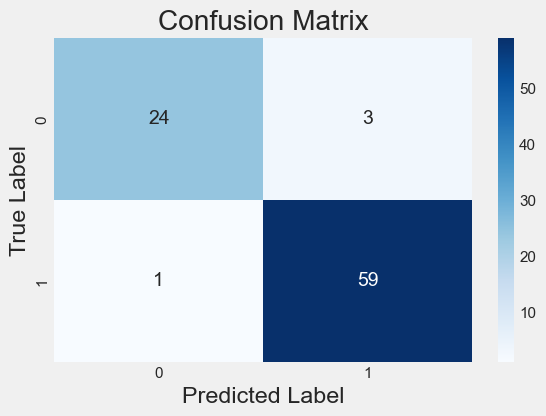


Confusion Matrix:
[[24  3]
 [ 1 59]]


In [294]:
#Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

# Visualize confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)


In [262]:
 #Hyper parameter tuning 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, recall_score

param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet', 'None'],
    'C': [float(x) for x in np.linspace(0.0001, 0.01)],
    'solver': ['liblinear', 'saga', 'sag'],
    'random_state': [42]
}

# Create a scorer for recall
recall_scorer = make_scorer(recall_score)

# Initialize GridSearchCV with recall as the scoring metric
grid_search = GridSearchCV(
    estimator=LogisticRegression(class_weight='balanced'),
    param_grid=param_grid,
    scoring=recall_scorer,
    cv=5
)

# Fit GridSearchCV
grid_search.fit(X_train_scaled, y_train)

# Get the best estimator found by grid search
best_clf = grid_search.best_estimator_

# Predict probabilities on the test set
y_prob = best_clf.predict_proba(X_test_scaled)[:, 1]

# Evaluate model
eval_classification(grid_search)
show_best_hyperparameter(grid_search)


Accuracy (Test Set): 0.95
Accuracy (Train Set): 0.96
Precision (Test Set): 0.95
Precision (Train Set): 0.96
Recall (Test Set): 0.98
Recall (Train Set): 0.98
F1-Score (Test Set): 0.97
F1-Score (Train Set): 0.97
roc_auc (test-proba): 0.99
roc_auc (train-proba): 0.99
recall (crossval train): 0.9836079929941883
recall (crossval test): 0.9847435897435897
True Positives (TP): 195
False Positives (FP): 39
True Negatives (TN): 50
False Negatives (FN): 3
{'C': 0.004746938775510205, 'class_weight': 'balanced', 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': 42, 'solver': 'saga', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


Confusion Matrix:
 [[20  7]
 [ 1 59]]


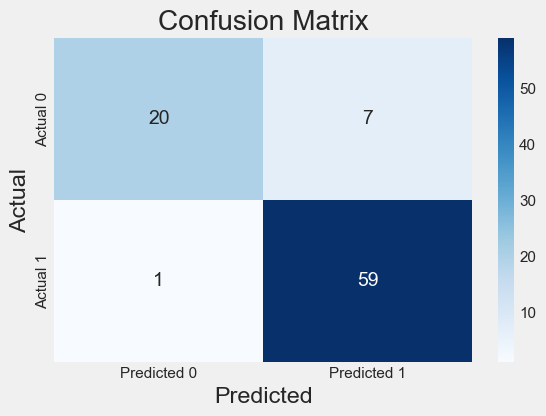

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.74      0.83        27
           1       0.89      0.98      0.94        60

    accuracy                           0.91        87
   macro avg       0.92      0.86      0.88        87
weighted avg       0.91      0.91      0.90        87



In [304]:
from sklearn.metrics import confusion_matrix, classification_report

# Predict the class labels on the test set (hasil hyperparameter tuning)
y_pred = best_clf.predict(X_test_scaled)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Classification report untuk metrik tambahan
print("Classification Report:\n", classification_report(y_test, y_pred))

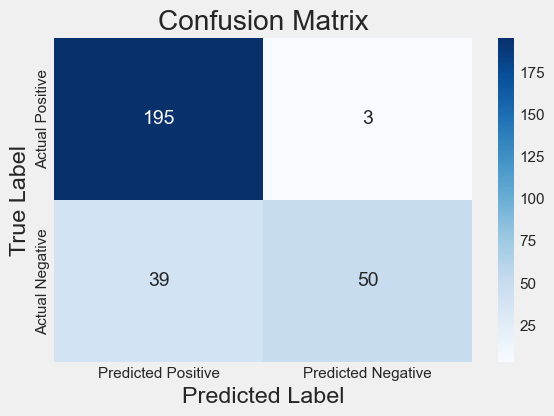

In [266]:
# Data yang diberikan
TP = 195  # True Positives
FP = 39   # False Positives
TN = 50   # True Negatives
FN = 3    # False Negatives

# Buat confusion matrix
conf_matrix = np.array([[TP, FN], [FP, TN]])

# Visualisasi confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Predicted Positive', 'Predicted Negative'], yticklabels=['Actual Positive', 'Actual Negative'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

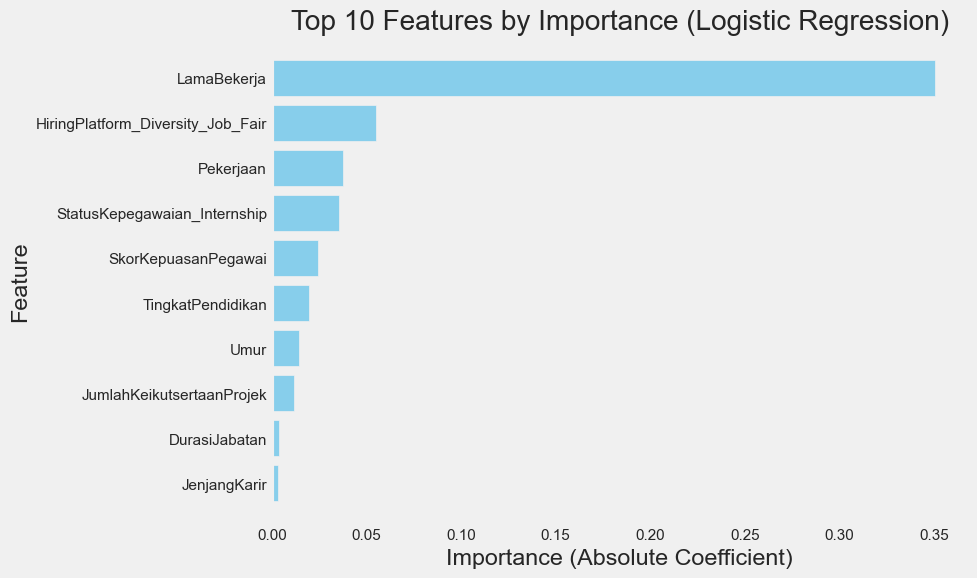

In [162]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Ambil koefisien dari model terbaik
coefficients = best_clf.coef_[0]  # Ambil koefisien dari model yang sudah dilatih

# Ambil nama-nama fitur dari data training sebelum scaling
feature_names = X_train.columns

# Buat DataFrame untuk fitur dan koefisiennya
feature_df = pd.DataFrame({
    'Feature': feature_names, 
    'Coefficient': coefficients
})

# Hitung nilai absolut dari koefisien untuk menentukan importance
feature_df['Importance'] = np.abs(feature_df['Coefficient'])

# Urutkan berdasarkan importance
sorted_feature_df = feature_df.sort_values(by='Importance', ascending=True)

# Plot 10 fitur teratas berdasarkan importance
plt.figure(figsize=(8, 6))
top_features = sorted_feature_df.head(10)  # Ambil 10 fitur teratas
plt.barh(top_features['Feature'], top_features['Importance'], color='skyblue')
plt.xlabel('Importance (Absolute Coefficient)')
plt.ylabel('Feature')
plt.title('Top 10 Features by Importance (Logistic Regression)')

# Hilangkan grid dari plot
plt.grid(False)

# Tampilkan plot
plt.show()

In [182]:
!pip install shap
import shap

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.1.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


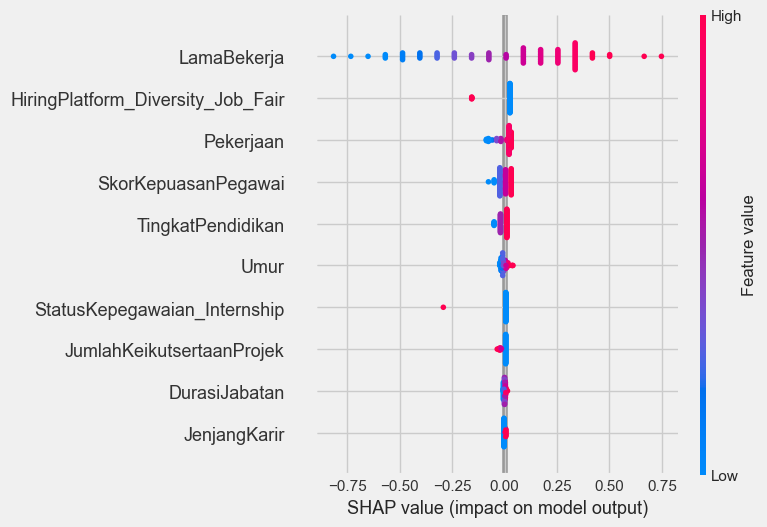

In [186]:
# Buat explainer menggunakan LinearExplainer untuk model Logistic Regression
explainer = shap.LinearExplainer(best_clf , X_train_scaled)

# Hitung SHAP values untuk X_test_scaled
shap_values = explainer.shap_values(X_test_scaled)

# Plot SHAP summary untuk fitur yang paling berpengaruh
shap.summary_plot(shap_values, X_test_scaled, feature_names=X_train.columns)

### Decission Tree 

In [190]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.model_selection import cross_validate, cross_val_predict

X_train = X_train
y_train = y_train


def eval_classification(model):
    # Fit the model
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    y_pred_proba = model.predict_proba(X_test)
    y_pred_proba_train = model.predict_proba(X_train)

    print("Accuracy (Test Set): %.2f" % accuracy_score(y_test, y_pred))
    print("Accuracy (Train Set): %.2f" % accuracy_score(y_train, y_pred_train))
    print("Precision (Test Set): %.2f" % precision_score(y_test, y_pred))
    print("Precision (Train Set): %.2f" % precision_score(y_train, y_pred_train))
    print("Recall (Test Set): %.2f" % recall_score(y_test, y_pred))
    print("Recall (Train Set): %.2f" % recall_score(y_train, y_pred_train))
    print("F1-Score (Test Set): %.2f" % f1_score(y_test, y_pred))
    print("F1-Score (Train Set): %.2f" % f1_score(y_train, y_pred_train))

    print("roc_auc (test-proba): %.2f" % roc_auc_score(y_test, y_pred_proba[:, 1]))
    print("roc_auc (train-proba): %.2f" % roc_auc_score(y_train, y_pred_proba_train[:, 1]))
    
    score = cross_validate(model, X, y, cv=5, scoring='recall', return_train_score=True)
    print('recall (crossval train): ' + str(score['train_score'].mean()))
    print('recall (crossval test): ' + str(score['test_score'].mean()))

    # Cross-validation predictions
    y_pred_cv = cross_val_predict(model, X, y, cv=5)

    # Confusion Matrix
    cm = confusion_matrix(y, y_pred_cv)
    TN, FP, FN, TP = cm.ravel()
    print(f"True Positives (TP): {TP}")
    print(f"False Positives (FP): {FP}")
    print(f"True Negatives (TN): {TN}")
    print(f"False Negatives (FN): {FN}")

def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=X.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()

    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('feature importance score')

def show_best_hyperparameter(grid_search):
    print("Best Hyperparameters: ", grid_search.best_params_)

In [192]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
eval_classification(dt)

Accuracy (Test Set): 0.97
Accuracy (Train Set): 1.00
Precision (Test Set): 0.95
Precision (Train Set): 1.00
Recall (Test Set): 1.00
Recall (Train Set): 1.00
F1-Score (Test Set): 0.98
F1-Score (Train Set): 1.00
roc_auc (test-proba): 0.94
roc_auc (train-proba): 1.00
recall (crossval train): 1.0
recall (crossval test): 0.9798717948717949
True Positives (TP): 194
False Positives (FP): 4
True Negatives (TN): 85
False Negatives (FN): 4


Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best Hyperparameters:  {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10}
Accuracy (Test Set): 0.95
Accuracy (Train Set): 0.99
Precision (Test Set): 0.94
Precision (Train Set): 0.99
Recall (Test Set): 1.00
Recall (Train Set): 0.99
F1-Score (Test Set): 0.97
F1-Score (Train Set): 0.99
roc_auc (test-proba): 0.96
roc_auc (train-proba): 1.00
recall (crossval train): 0.9861237162646285
recall (crossval test): 0.9697435897435897
True Positives (TP): 192
False Positives (FP): 6
True Negatives (TN): 83
False Negatives (FN): 6


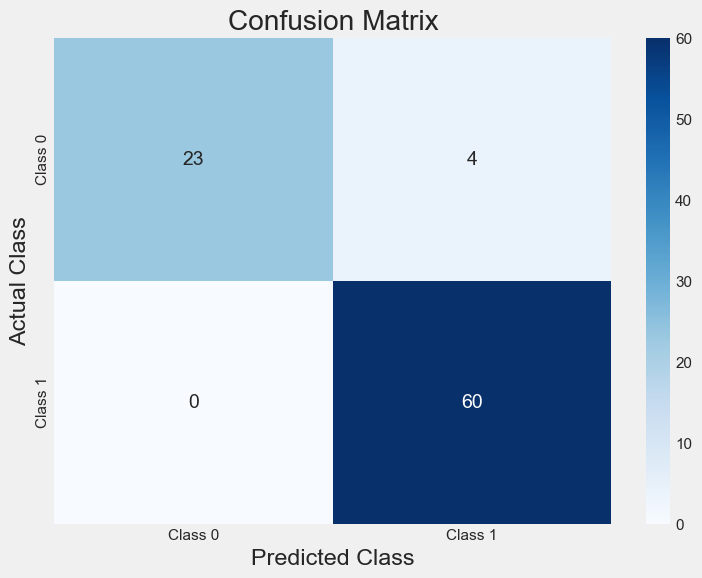

In [194]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, roc_auc_score, classification_report, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Inisialisasi DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)

# Definisikan parameter yang akan di-tune
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10]
}

# Inisialisasi GridSearchCV
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, n_jobs=-1, verbose=1, scoring='recall')

# Melatih model menggunakan GridSearchCV
grid_search.fit(X_train, y_train)

# Menampilkan hyperparameter terbaik
print("Best Hyperparameters: ", grid_search.best_params_)

# Menggunakan model terbaik dari GridSearchCV
best_dt = grid_search.best_estimator_

eval_classification(best_dt)

# Menggunakan model terbaik untuk prediksi pada data test
y_pred = best_dt.predict(X_test)

# Menggunakan confusion_matrix
cm = confusion_matrix(y_test, y_pred)

# Visualisasi confusion matrix menggunakan Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title('Confusion Matrix')
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')
plt.show()

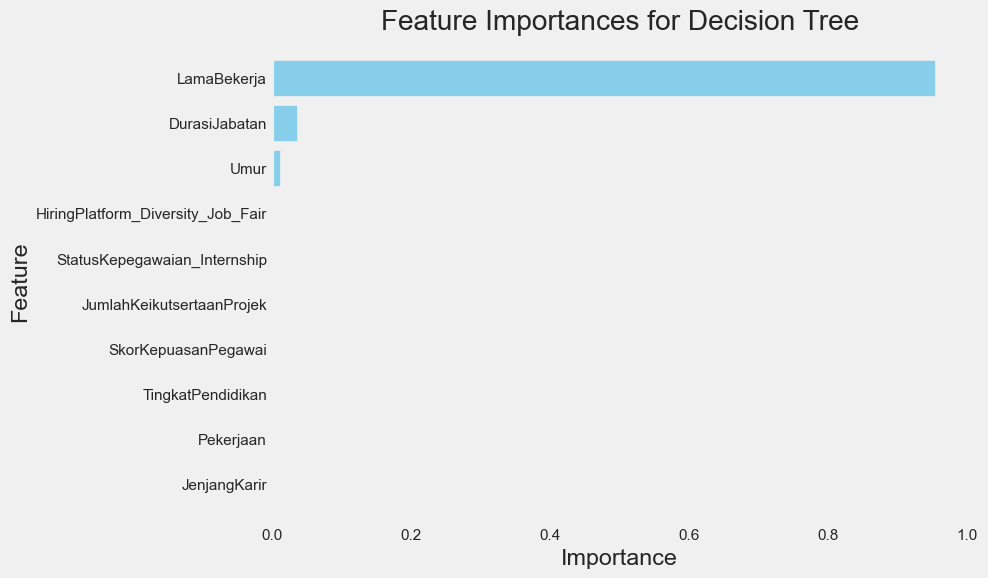

In [196]:
# Train your DecisionTreeClassifier (using the best estimator from GridSearchCV)
model = best_dt  # Menggunakan model terbaik dari GridSearchCV yang sudah dilatih

# Get feature importances
feature_importance = model.feature_importances_
feature_names = X.columns

# Create a DataFrame to store feature names and their importances
feature_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})

# Sort the DataFrame by Importance in ascending order
sorted_feature_df = feature_df.sort_values(by='Importance', ascending=True)

# Plot the top 10 feature importances in a bar chart
plt.figure(figsize=(8, 6))
top_features = sorted_feature_df.tail(10)  # Get the top 10 features
plt.barh(top_features['Feature'], top_features['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances for Decision Tree')

# Remove grid from the plot
plt.grid(False)

# Show the plot
plt.show()

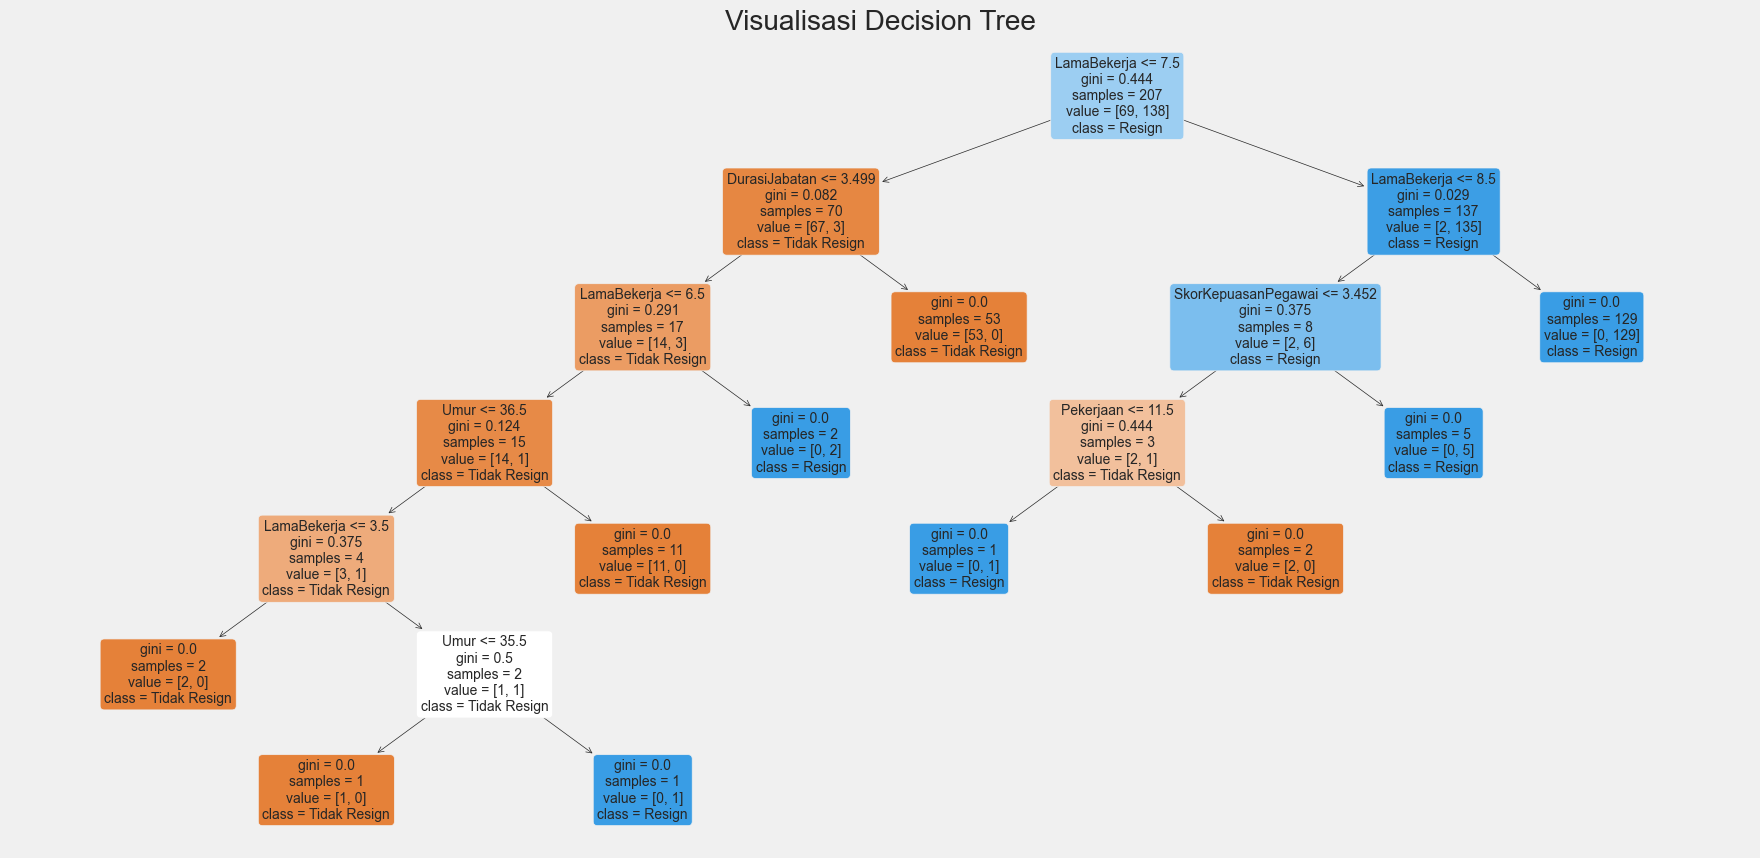

In [198]:

import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Assign features dan target variable
X = df_new[[ 'LamaBekerja', 'DurasiJabatan', 'JenjangKarir', 'Pekerjaan', 'TingkatPendidikan', 
           'Umur', 'SkorKepuasanPegawai', 'JumlahKeikutsertaanProjek', 'StatusKepegawaian_Internship', 'HiringPlatform_Diversity_Job_Fair']]
y = df_new['StatusKerja']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Initialize SMOTE
smote = SMOTE(random_state=42, sampling_strategy=0.5)

# Apply SMOTE to the training data
X_train, y_train = smote.fit_resample(X_train, y_train)

# Inisialisasi dan latih Decision Tree Classifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

# Visualisasi Decision Tree
plt.figure(figsize=(20,10))  # Atur ukuran gambar
plot_tree(dt, feature_names=X.columns, class_names=['Tidak Resign', 'Resign'], filled=True, rounded=True, fontsize=10)
plt.title('Visualisasi Decision Tree')
plt.show()

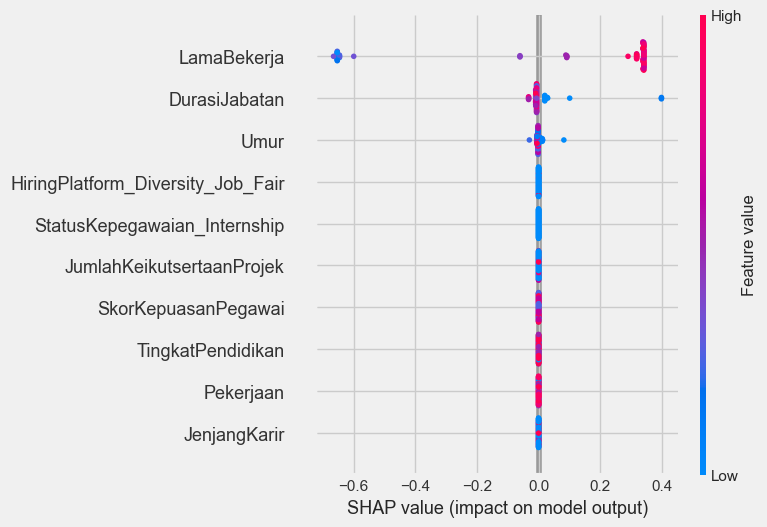

In [204]:
import shap

# Use SHAP TreeExplainer for Decision Tree models
explainer = shap.TreeExplainer(best_dt)

# Calculate SHAP values
shap_values = explainer.shap_values(X_test)

# Plot SHAP values
shap.summary_plot(shap_values [:, :, 1], X_test, feature_names=X.columns) #

### Random Forest Classifier

In [208]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.model_selection import cross_validate, cross_val_predict

X_train = X_train
y_train = y_train


def eval_classification(model):
    # Fit the model
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    y_pred_proba = model.predict_proba(X_test)
    y_pred_proba_train = model.predict_proba(X_train)

    print("Accuracy (Test Set): %.2f" % accuracy_score(y_test, y_pred))
    print("Accuracy (Train Set): %.2f" % accuracy_score(y_train, y_pred_train))
    print("Precision (Test Set): %.2f" % precision_score(y_test, y_pred))
    print("Precision (Train Set): %.2f" % precision_score(y_train, y_pred_train))
    print("Recall (Test Set): %.2f" % recall_score(y_test, y_pred))
    print("Recall (Train Set): %.2f" % recall_score(y_train, y_pred_train))
    print("F1-Score (Test Set): %.2f" % f1_score(y_test, y_pred))
    print("F1-Score (Train Set): %.2f" % f1_score(y_train, y_pred_train))

    print("roc_auc (test-proba): %.2f" % roc_auc_score(y_test, y_pred_proba[:, 1]))
    print("roc_auc (train-proba): %.2f" % roc_auc_score(y_train, y_pred_proba_train[:, 1]))
    
    score = cross_validate(model, X, y, cv=5, scoring='recall', return_train_score=True)
    print('recall (crossval train): ' + str(score['train_score'].mean()))
    print('recall (crossval test): ' + str(score['test_score'].mean()))

    # Cross-validation predictions
    y_pred_cv = cross_val_predict(model, X, y, cv=5)

    # Confusion Matrix
    cm = confusion_matrix(y, y_pred_cv)
    TN, FP, FN, TP = cm.ravel()
    print(f"True Positives (TP): {TP}")
    print(f"False Positives (FP): {FP}")
    print(f"True Negatives (TN): {TN}")
    print(f"False Negatives (FN): {FN}")

def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=X.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()

    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('feature importance score')

def show_best_hyperparameter(model):
      print(model.best_estimator_.get_params())

In [210]:
from sklearn.metrics import confusion_matrix, recall_score
from sklearn.ensemble import RandomForestClassifier

# Fit Model Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
eval_classification(rf)

Accuracy (Test Set): 0.97
Accuracy (Train Set): 1.00
Precision (Test Set): 0.97
Precision (Train Set): 1.00
Recall (Test Set): 0.98
Recall (Train Set): 1.00
F1-Score (Test Set): 0.98
F1-Score (Train Set): 1.00
roc_auc (test-proba): 1.00
roc_auc (train-proba): 1.00
recall (crossval train): 1.0
recall (crossval test): 0.9848717948717949
True Positives (TP): 195
False Positives (FP): 4
True Negatives (TN): 85
False Negatives (FN): 3


Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Best Hyperparameters:  {'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Accuracy (Test Set): 0.97
Accuracy (Train Set): 1.00
Precision (Test Set): 0.97
Precision (Train Set): 1.00
Recall (Test Set): 0.98
Recall (Train Set): 1.00
F1-Score (Test Set): 0.98
F1-Score (Train Set): 1.00
roc_auc (test-proba): 1.00
roc_auc (train-proba): 1.00
recall (crossval train): 1.0
recall (crossval test): 0.9848717948717949
True Positives (TP): 195
False Positives (FP): 4
True Negatives (TN): 85
False Negatives (FN): 3


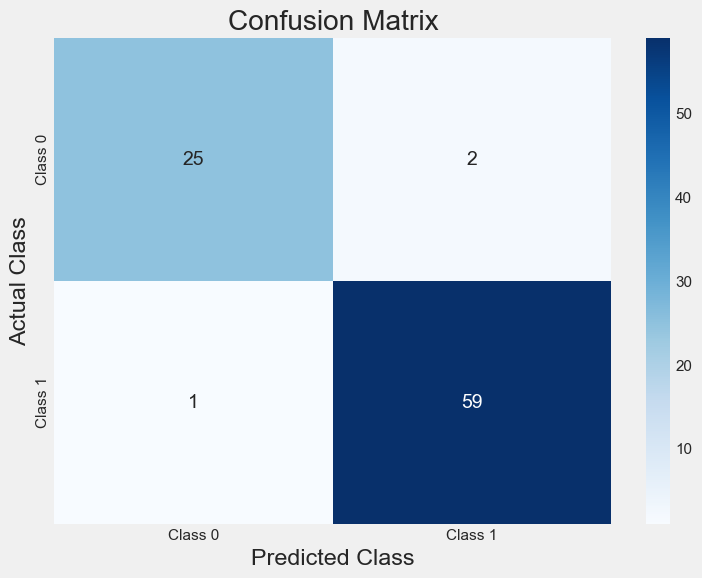

In [212]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, roc_auc_score, classification_report, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Inisialisasi RandomForestClassifier
rf = RandomForestClassifier(random_state=42)

# Definisikan parameter yang akan di-tune
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 2, 4],
}

# Inisialisasi GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=1, scoring='recall')

# Melatih model menggunakan GridSearchCV
grid_search.fit(X_train, y_train)

# Menampilkan hyperparameter terbaik
print("Best Hyperparameters: ", grid_search.best_params_)

# Menggunakan model terbaik dari GridSearchCV
best_rf = grid_search.best_estimator_

# Evaluasi model
eval_classification(best_rf)

# Menggunakan model terbaik untuk prediksi pada data test
y_pred = best_rf.predict(X_test)

# Menggunakan confusion_matrix
cm = confusion_matrix(y_test, y_pred)

# Visualisasi confusion matrix menggunakan Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title('Confusion Matrix')
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')
plt.show()

### SVM

In [217]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.model_selection import cross_validate, cross_val_predict

X_train = X_train
y_train = y_train


def eval_classification(model):
    # Fit the model
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    y_pred_proba = model.predict_proba(X_test)
    y_pred_proba_train = model.predict_proba(X_train)

    print("Accuracy (Test Set): %.2f" % accuracy_score(y_test, y_pred))
    print("Accuracy (Train Set): %.2f" % accuracy_score(y_train, y_pred_train))
    print("Precision (Test Set): %.2f" % precision_score(y_test, y_pred))
    print("Precision (Train Set): %.2f" % precision_score(y_train, y_pred_train))
    print("Recall (Test Set): %.2f" % recall_score(y_test, y_pred))
    print("Recall (Train Set): %.2f" % recall_score(y_train, y_pred_train))
    print("F1-Score (Test Set): %.2f" % f1_score(y_test, y_pred))
    print("F1-Score (Train Set): %.2f" % f1_score(y_train, y_pred_train))

    print("roc_auc (test-proba): %.2f" % roc_auc_score(y_test, y_pred_proba[:, 1]))
    print("roc_auc (train-proba): %.2f" % roc_auc_score(y_train, y_pred_proba_train[:, 1]))
    
    score = cross_validate(model, X, y, cv=5, scoring='recall', return_train_score=True)
    print('recall (crossval train): ' + str(score['train_score'].mean()))
    print('recall (crossval test): ' + str(score['test_score'].mean()))

    # Cross-validation predictions
    y_pred_cv = cross_val_predict(model, X, y, cv=5)

    # Confusion Matrix
    cm = confusion_matrix(y, y_pred_cv)
    TN, FP, FN, TP = cm.ravel()
    print(f"True Positives (TP): {TP}")
    print(f"False Positives (FP): {FP}")
    print(f"True Negatives (TN): {TN}")
    print(f"False Negatives (FN): {FN}")

def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=X.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()

    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('feature importance score')

def show_best_hyperparameter(model):
      print(model.best_estimator_.get_params())

In [219]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Inisialisasi SVM model dengan probability=True
svm_model = SVC(probability=True)

# Step 3: Melatih model menggunakan data training
svm_model.fit(X_train_scaled, y_train)

# Evaluasi model
eval_classification(svm_model)

Accuracy (Test Set): 0.93
Accuracy (Train Set): 0.93
Precision (Test Set): 0.91
Precision (Train Set): 0.90
Recall (Test Set): 1.00
Recall (Train Set): 1.00
F1-Score (Test Set): 0.95
F1-Score (Train Set): 0.95
roc_auc (test-proba): 1.00
roc_auc (train-proba): 1.00
recall (crossval train): 1.0
recall (crossval test): 1.0
True Positives (TP): 198
False Positives (FP): 21
True Negatives (TN): 68
False Negatives (FN): 0


In [221]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Definisikan parameter grid untuk tuning
param_grid = {
    'C': [0.1, 1, 10, 100],  # Parameter regularisasi
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],  # Jenis kernel
    'gamma': ['scale', 'auto', 0.1, 1],  # Parameter gamma
    'degree': [3, 4, 5],  # Derajat polinomial (untuk kernel poly)
    'coef0': [0, 0.1, 1]  # Parameter untuk kernel poly dan sigmoid
}

# Inisialisasi model SVM
svm_model = SVC(probability=True, random_state=42)

# Inisialisasi GridSearchCV dengan cross-validation dan scoring berdasarkan accuracy
grid_search = GridSearchCV(estimator=svm_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)

# Latih GridSearchCV pada data training
grid_search.fit(X_train_scaled, y_train)

# Tampilkan parameter terbaik dan skor terbaik
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation score: {grid_search.best_score_}")

# Gunakan model terbaik yang ditemukan oleh GridSearchCV
best_svm_model = grid_search.best_estimator_

# Evaluasi model terbaik
eval_classification(best_svm_model)

# Tampilkan confusion matrix dan classification report
y_pred = best_svm_model.predict(X_test_scaled)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Fitting 5 folds for each of 576 candidates, totalling 2880 fits
Best parameters: {'C': 1, 'coef0': 0, 'degree': 3, 'gamma': 'scale', 'kernel': 'linear'}
Best cross-validation score: 0.9951219512195122
Accuracy (Test Set): 0.98
Accuracy (Train Set): 1.00
Precision (Test Set): 0.97
Precision (Train Set): 0.99
Recall (Test Set): 1.00
Recall (Train Set): 1.00
F1-Score (Test Set): 0.98
F1-Score (Train Set): 1.00
roc_auc (test-proba): 1.00
roc_auc (train-proba): 1.00
recall (crossval train): 1.0
recall (crossval test): 0.9949999999999999
True Positives (TP): 197
False Positives (FP): 3
True Negatives (TN): 86
False Negatives (FN): 1
Confusion Matrix:
 [[27  0]
 [60  0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.31      1.00      0.47        27
           1       0.00      0.00      0.00        60

    accuracy                           0.31        87
   macro avg       0.16      0.50      0.24        87
weighted avg       0.10      0.

### Gradient Boosting

In [224]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.model_selection import cross_validate, cross_val_predict

X_train = X_train
y_train = y_train


def eval_classification(model):
    # Fit the model
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    y_pred_proba = model.predict_proba(X_test)
    y_pred_proba_train = model.predict_proba(X_train)

    print("Accuracy (Test Set): %.2f" % accuracy_score(y_test, y_pred))
    print("Accuracy (Train Set): %.2f" % accuracy_score(y_train, y_pred_train))
    print("Precision (Test Set): %.2f" % precision_score(y_test, y_pred))
    print("Precision (Train Set): %.2f" % precision_score(y_train, y_pred_train))
    print("Recall (Test Set): %.2f" % recall_score(y_test, y_pred))
    print("Recall (Train Set): %.2f" % recall_score(y_train, y_pred_train))
    print("F1-Score (Test Set): %.2f" % f1_score(y_test, y_pred))
    print("F1-Score (Train Set): %.2f" % f1_score(y_train, y_pred_train))

    print("roc_auc (test-proba): %.2f" % roc_auc_score(y_test, y_pred_proba[:, 1]))
    print("roc_auc (train-proba): %.2f" % roc_auc_score(y_train, y_pred_proba_train[:, 1]))
    
    score = cross_validate(model, X, y, cv=5, scoring='recall', return_train_score=True)
    print('recall (crossval train): ' + str(score['train_score'].mean()))
    print('recall (crossval test): ' + str(score['test_score'].mean()))

    # Cross-validation predictions
    y_pred_cv = cross_val_predict(model, X, y, cv=5)

    # Confusion Matrix
    cm = confusion_matrix(y, y_pred_cv)
    TN, FP, FN, TP = cm.ravel()
    print(f"True Positives (TP): {TP}")
    print(f"False Positives (FP): {FP}")
    print(f"True Negatives (TN): {TN}")
    print(f"False Negatives (FN): {FN}")

def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=X.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()

    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('feature importance score')

def show_best_hyperparameter(model):
      print(model.best_estimator_.get_params())

In [226]:
from sklearn.ensemble import GradientBoostingClassifier

# Inisialisasi model Gradient Boosting
gb_model = GradientBoostingClassifier(random_state=42)

# Evaluasi model
eval_classification(gb_model)

# Tampilkan pentingnya fitur
#show_feature_importance(gb_model)

Accuracy (Test Set): 0.99
Accuracy (Train Set): 1.00
Precision (Test Set): 0.98
Precision (Train Set): 1.00
Recall (Test Set): 1.00
Recall (Train Set): 1.00
F1-Score (Test Set): 0.99
F1-Score (Train Set): 1.00
roc_auc (test-proba): 1.00
roc_auc (train-proba): 1.00
recall (crossval train): 1.0
recall (crossval test): 0.9949999999999999
True Positives (TP): 197
False Positives (FP): 4
True Negatives (TN): 85
False Negatives (FN): 1


In [232]:
from sklearn.model_selection import GridSearchCV

# Tentukan hyperparameter yang ingin dicoba
param_grid = {
    'n_estimators': [10, 50, 100 ],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

# Inisialisasi model
gb_model = GradientBoostingClassifier(random_state=42)

# Inisialisasi GridSearchCV
grid_search = GridSearchCV(estimator=gb_model, param_grid=param_grid, 
                           scoring='recall', cv=5, verbose=2, n_jobs=-1)

# Fit model
grid_search.fit(X_train, y_train)
eval_classification(grid_search)

# Tampilkan parameter terbaik
print("Best Parameters: ", grid_search.best_params_)
print("Best Score: ", grid_search.best_score_)

Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Accuracy (Test Set): 0.69
Accuracy (Train Set): 0.67
Precision (Test Set): 0.69
Precision (Train Set): 0.67
Recall (Test Set): 1.00
Recall (Train Set): 1.00
F1-Score (Test Set): 0.82
F1-Score (Train Set): 0.80
ROC AUC (Test Set): 0.94
ROC AUC (Train Set): 1.00
Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Recall (Crossval Train): 1.00
Recall (Crossval Test): 1.00
Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Fitting 5 folds for each of 243 candidat

### Comparison Model

In [234]:
from tabulate import tabulate
data = {
   'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest', 'SVM', 'Gradient Boosting'],
    'Accuracy (Test Set)': [0.95, 0.95, 0.97, 0.98, 0.69],
    'Accuracy (Train Set)': [0.96, 0.99, 1.00, 1.00, 0.67],
    'Precision (Test Set)': [0.95, 0.94, 0.97, 0.97, 0.69],
    'Precision (Train Set)': [0.96, 0.99, 1.00, 0.99, 0.67],
    'Recall (Test Set)': [0.98, 1.00, 0.98, 1.00, 1.00],
    'Recall (Train Set)': [0.98, 0.99, 1.00, 1.00, 1.00],
    'F1-Score (Test Set)': [0.97, 0.97, 0.98, 0.98, 0.82],
    'F1-Score (Train Set)': [0.97, 0.99, 1.00, 1.00, 0.80],
    'ROC AUC (Test Proba)': [0.99, 0.96, 1.00, 1.00, 0.94],
    'ROC AUC (Train Proba)': [0.99, 1.00, 1.00, 1.00, 1.00],
    'Recall (Crossval Train)': [0.9836, 0.9861, 1.00, 1.00, 1.00],
    'Recall (Crossval Test)': [0.9847, 0.9697, 0.9849, 0.9950, 1.00],
    'True Positives (TP)': [195, 192, 195, 197, 198],
    'False Positives (FP)': [39, 6, 4, 3, 89],
    'True Negatives (TN)': [50, 83, 85, 86, 0],
    'False Negatives (FN)': [3, 6, 3, 1, 0]
}

# Convert to DataFrame
CM = pd.DataFrame(data)

# Set 'Model' as index
CM.set_index('Model', inplace=True)

pd.set_option('display.max_columns', None)  # Menampilkan semua kolom
pd.set_option('display.expand_frame_repr', False)  # Memastikan tabel tidak terpecah ke baris berikutnya
pd.set_option('display.width', 100)  # Menyeting lebar tampilan maksimum


# Menampilkan DataFrame
print((CM))

                     Accuracy (Test Set)  Accuracy (Train Set)  Precision (Test Set)  Precision (Train Set)  Recall (Test Set)  Recall (Train Set)  F1-Score (Test Set)  F1-Score (Train Set)  ROC AUC (Test Proba)  ROC AUC (Train Proba)  Recall (Crossval Train)  Recall (Crossval Test)  True Positives (TP)  False Positives (FP)  True Negatives (TN)  False Negatives (FN)
Model                                                                                                                                                                                                                                                                                                                                                                            
Logistic Regression                 0.95                  0.96                  0.95                   0.96               0.98                0.98                 0.97                  0.97                  0.99                   0.99                   0.9836 

In [236]:
CM

,Accuracy (Test Set),Accuracy (Train Set),Precision (Test Set),Precision (Train Set),Recall (Test Set),Recall (Train Set),F1-Score (Test Set),F1-Score (Train Set),ROC AUC (Test Proba),ROC AUC (Train Proba),Recall (Crossval Train),Recall (Crossval Test),True Positives (TP),False Positives (FP),True Negatives (TN),False Negatives (FN)
Model,,,,,,,,,,,,,,,,
Logistic Regression,0.95,0.96,0.95,0.96,0.98,0.98,0.97,0.97,0.99,0.99,0.9836,0.9847,195,39,50,3
Decision Tree,0.95,0.99,0.94,0.99,1.00,0.99,0.97,0.99,0.96,1.00,0.9861,0.9697,192,6,83,6
Random Forest,0.97,1.00,0.97,1.00,0.98,1.00,0.98,1.00,1.00,1.00,1.0000,0.9849,195,4,85,3
SVM,0.98,1.00,0.97,0.99,1.00,1.00,0.98,1.00,1.00,1.00,1.0000,0.9950,197,3,86,1
Gradient Boosting,0.69,0.67,0.69,0.67,1.00,1.00,0.82,0.80,0.94,1.00,1.0000,1.0000,198,89,0,0
